**Connect google drive**

In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

**Clone the Darknet**



In [ ]:
!git clone https://github.com/AlexeyAB/darknet

**Compile Darknet using Nvidia GPU**


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

**Configure Darknet network for training YOLO V3**

In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [ ]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [ ]:
!mkdir "/mydrive/yolov3"

In [ ]:
!echo "Ship" > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data
!mkdir data/obj

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

**Extract Images**

In [ ]:
!unzip /mydrive/yolov3/images.zip -d data/obj

In [ ]:
import glob
import os
import re

txt_file_paths = glob.glob(r"data/obj/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

In [ ]:
import glob
images_list = glob.glob("data/obj/*.jpg")
print(images_list)

In [ ]:
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

**Start the training**

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

**IOU SCORE**
266: 1.896723, 1.749346 avg loss, 0.000005 rate, 11.110969 seconds, 17024 images, 16.828849 hours left
Loaded: 0.000098 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.490016), count: 1, class_loss = 0.351982, iou_loss = 0.228582, total_loss = 0.580564 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.384144), count: 1, class_loss = 0.345253, iou_loss = 0.344569, total_loss = 0.689822 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.366494), count: 3, class_loss = 0.990604, iou_loss = 2.592541, total_loss = 3.583145 
 total_bbox = 21750, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.289879), count: 4, class_loss = 1.228960, iou_loss = 3.108448, total_loss = 4.337408 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.057393, iou_loss = 0.000000, total_loss = 0.057393 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.054211, iou_loss = 0.000000, total_loss = 0.054211 
 total_bbox = 21754, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.431542), count: 2, class_loss = 0.639036, iou_loss = 0.599565, total_loss = 1.238601 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.056076, iou_loss = 0.000000, total_loss = 0.056076 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.213338), count: 2, class_loss = 0.627857, iou_loss = 2.544555, total_loss = 3.172412 
 total_bbox = 21758, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.394391), count: 1, class_loss = 0.324938, iou_loss = 0.321197, total_loss = 0.646135 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.352078), count: 1, class_loss = 0.366042, iou_loss = 0.585987, total_loss = 0.952029 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.230598), count: 4, class_loss = 1.205527, iou_loss = 3.390476, total_loss = 4.596003 
 total_bbox = 21764, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.403417), count: 2, class_loss = 0.602821, iou_loss = 0.776741, total_loss = 1.379562 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.420918), count: 2, class_loss = 0.598289, iou_loss = 1.029501, total_loss = 1.627790 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.358810), count: 1, class_loss = 0.410449, iou_loss = 0.468661, total_loss = 0.879110 
 total_bbox = 21769, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.372768), count: 1, class_loss = 0.369749, iou_loss = 0.496059, total_loss = 0.865808 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.057474, iou_loss = 0.000000, total_loss = 0.057474 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.417281), count: 4, class_loss = 1.351171, iou_loss = 1.733997, total_loss = 3.085168 
 total_bbox = 21774, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.056204, iou_loss = 0.000000, total_loss = 0.056204 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.257169), count: 1, class_loss = 0.321242, iou_loss = 0.599542, total_loss = 0.920784 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.058930, iou_loss = 0.000000, total_loss = 0.058930 
 total_bbox = 21775, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.057654, iou_loss = 0.000000, total_loss = 0.057654 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.476565), count: 3, class_loss = 0.886102, iou_loss = 1.206148, total_loss = 2.092250 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.521300), count: 1, class_loss = 0.316612, iou_loss = 0.273780, total_loss = 0.590392 
 total_bbox = 21779, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.217889), count: 1, class_loss = 0.362797, iou_loss = 1.108795, total_loss = 1.471592 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.457179), count: 1, class_loss = 0.325441, iou_loss = 0.365895, total_loss = 0.691336 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.313101), count: 6, class_loss = 1.792136, iou_loss = 4.516921, total_loss = 6.309057 
 total_bbox = 21787, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.505463), count: 2, class_loss = 0.610542, iou_loss = 0.549565, total_loss = 1.160108 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.370754), count: 1, class_loss = 0.354783, iou_loss = 0.630192, total_loss = 0.984975 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.058712, iou_loss = 0.000000, total_loss = 0.058712 
 total_bbox = 21790, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.052774, iou_loss = 0.000000, total_loss = 0.052774 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.481098), count: 4, class_loss = 1.192684, iou_loss = 1.236146, total_loss = 2.428829 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.051707, iou_loss = 0.000000, total_loss = 0.051707 
 total_bbox = 21794, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.058140, iou_loss = 0.000000, total_loss = 0.058140 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.385794), count: 4, class_loss = 1.256576, iou_loss = 2.047328, total_loss = 3.303904 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.409393), count: 4, class_loss = 1.239571, iou_loss = 1.847070, total_loss = 3.086641 
 total_bbox = 21802, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.053999, iou_loss = 0.000000, total_loss = 0.053999 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.430025), count: 3, class_loss = 1.009635, iou_loss = 1.376240, total_loss = 2.385874 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.294898), count: 3, class_loss = 0.944015, iou_loss = 2.464089, total_loss = 3.408104 
 total_bbox = 21808, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.707456), count: 1, class_loss = 0.320794, iou_loss = 0.058139, total_loss = 0.378933 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.417289), count: 2, class_loss = 0.631267, iou_loss = 0.660555, total_loss = 1.291822 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.333315), count: 4, class_loss = 1.198033, iou_loss = 2.858908, total_loss = 4.056941 
 total_bbox = 21815, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.205862), count: 2, class_loss = 0.635524, iou_loss = 2.441346, total_loss = 3.076871 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.305853), count: 1, class_loss = 0.341125, iou_loss = 0.723361, total_loss = 1.064486 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.053626, iou_loss = 0.000000, total_loss = 0.053626 
 total_bbox = 21818, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.427761), count: 1, class_loss = 0.343883, iou_loss = 0.482696, total_loss = 0.826579 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.453543), count: 1, class_loss = 0.323040, iou_loss = 0.182555, total_loss = 0.505595 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.343121), count: 2, class_loss = 0.647382, iou_loss = 1.585261, total_loss = 2.232643 
 total_bbox = 21822, rewritten_bbox = 0.000000 % 

 267: 1.471420, 1.721554 avg loss, 0.000005 rate, 11.111782 seconds, 17088 images, 16.775807 hours left
Loaded: 0.000046 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.055171, iou_loss = 0.000000, total_loss = 0.055171 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.561508), count: 3, class_loss = 0.922686, iou_loss = 0.668138, total_loss = 1.590824 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.277174), count: 1, class_loss = 0.357226, iou_loss = 0.564137, total_loss = 0.921363 
 total_bbox = 21826, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.052748, iou_loss = 0.000000, total_loss = 0.052748 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.374413), count: 1, class_loss = 0.352735, iou_loss = 0.338646, total_loss = 0.691381 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.379031), count: 4, class_loss = 1.240144, iou_loss = 2.216051, total_loss = 3.456195 
 total_bbox = 21831, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.058668, iou_loss = 0.000000, total_loss = 0.058668 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.544412), count: 2, class_loss = 0.609125, iou_loss = 0.489974, total_loss = 1.099099 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.408866), count: 3, class_loss = 0.993744, iou_loss = 2.015902, total_loss = 3.009645 
 total_bbox = 21836, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.056344, iou_loss = 0.000000, total_loss = 0.056344 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.463472), count: 2, class_loss = 0.624451, iou_loss = 0.874033, total_loss = 1.498484 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.458836), count: 7, class_loss = 2.162970, iou_loss = 3.060916, total_loss = 5.223886 
 total_bbox = 21845, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.055015, iou_loss = 0.000000, total_loss = 0.055015 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.309143), count: 2, class_loss = 0.676952, iou_loss = 1.207792, total_loss = 1.884744 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.503037), count: 2, class_loss = 0.607293, iou_loss = 0.623551, total_loss = 1.230844 
 total_bbox = 21849, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.258962), count: 2, class_loss = 0.612613, iou_loss = 1.760940, total_loss = 2.373554 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.057758, iou_loss = 0.000000, total_loss = 0.057758 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.207140), count: 5, class_loss = 1.446952, iou_loss = 5.726618, total_loss = 7.173570 
 total_bbox = 21856, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.053231, iou_loss = 0.000000, total_loss = 0.053231 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.511447), count: 2, class_loss = 0.710401, iou_loss = 0.508188, total_loss = 1.218589 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.453081), count: 4, class_loss = 1.158771, iou_loss = 1.496182, total_loss = 2.654953 
 total_bbox = 21862, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.249640), count: 2, class_loss = 0.694801, iou_loss = 1.713236, total_loss = 2.408037 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.368887), count: 1, class_loss = 0.371331, iou_loss = 0.425479, total_loss = 0.796811 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.245033), count: 3, class_loss = 1.000201, iou_loss = 2.490217, total_loss = 3.490418 
 total_bbox = 21868, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.615412), count: 1, class_loss = 0.339873, iou_loss = 0.086314, total_loss = 0.426187 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.455669), count: 2, class_loss = 0.612270, iou_loss = 0.651410, total_loss = 1.263680 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.056022, iou_loss = 0.000000, total_loss = 0.056022 
 total_bbox = 21871, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.527096), count: 1, class_loss = 0.395338, iou_loss = 0.144846, total_loss = 0.540184 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.281381), count: 3, class_loss = 0.862369, iou_loss = 2.613568, total_loss = 3.475937 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.298768), count: 1, class_loss = 0.430178, iou_loss = 0.891630, total_loss = 1.321808 
 total_bbox = 21876, rewritten_bbox = 0.000000 % 


**DICE SCORE**
tf.Tensor(
[0.6007202  0.60004103 0.5999076  0.5996281  0.599691   0.60081804
 0.6007604  0.5992361  0.5986596  0.5993086  0.59956    0.59944475
 0.5994347  0.59915054 0.5984978  0.5996038  0.6006844  0.6000081
 0.6000619  0.5999887  0.60050863 0.60045326 0.60063833 0.6001438
 0.60028446 0.6009216  0.60221106 0.60175395 0.60224557 0.6022303
 0.602902   0.6037951  0.60282147 0.60289276 0.603404   0.6018632
 0.6024136  0.60277    0.6018652  0.6023854  0.6027684  0.6022397
 0.6019     0.60148716 0.6025021  0.60254794 0.6020852  0.60211104
 0.6002724  0.6016077  0.60137886 0.60080254 0.60022974 0.599547
 0.6003184  0.60101527 0.5998601  0.6004175  0.6008838  0.60163426
 0.60145324 0.5997896  0.59989035 0.60110086 0.60036653 0.59952044
 0.5988154  0.6002502  0.6006859  0.5983132  0.59822994 0.5983851
 0.5978668  0.5985841  0.59744656 0.59694165 0.5976999  0.59743506
 0.5974665  0.59693867 0.59698415 0.59753317 0.5967084  0.5961268
 0.5949686  0.5949928  0.5961311  0.5953547  0.59539557 0.5960305
 0.5954243  0.59520715 0.5948132  0.59569496 0.5952534  0.59545463
 0.596032   0.5965634  0.5959405  0.59658253 0.59660304 0.5971437
 0.59656155 0.5963048  0.59635186 0.596341   0.59647423 0.5967321
 0.59696877 0.5977183  0.5973896  0.597522   0.5974037  0.5967752
 0.597043   0.59661716 0.59691226 0.59876436 0.59838396 0.5973664
 0.5975882  0.5985108  0.600249   0.5991522  0.59858006 0.59909374
 0.59797037 0.5984409  0.599227   0.59827936 0.59828204 0.5979782
 0.59804493 0.5984329  0.5982883  0.5980743  0.5965675  0.5961643
 0.5972857  0.59747255 0.59859794 0.59729695 0.5956838  0.5979034
 0.59869355 0.59771633 0.59698844 0.5968294  0.5961889  0.595553
 0.5962391  0.59724325 0.59603745 0.5962564  0.5964488  0.59705025
 0.59713453 0.5965813  0.5970429  0.5982454  0.59819984 0.59893495
 0.59796053 0.5976805  0.5979172  0.5972687  0.5984321  0.59732336
 0.5963155  0.5974731  0.5975813  0.59773123 0.5979415  0.5972578
 0.5961358  0.5963362  0.5962713  0.596435   0.5952548  0.5955004
 0.59533894 0.59511554 0.59590864 0.594723   0.5945191  0.59506905
 0.5943157  0.59409356 0.5944309  0.5944991  0.5951113  0.59403056
 0.5936058  0.59329206 0.59293056 0.5930899  0.5933925  0.5928026
 0.59284586 0.5928976  0.5921252  0.59154534 0.5910248  0.59209657
 0.59079295 0.5907239  0.59037197 0.5909679  0.5913357  0.591313
 0.59055936 0.59174484 0.591332   0.59154785 0.5909076  0.5910162
 0.5914916  0.58996785 0.5904059  0.5901294  0.58998907 0.5897875
 0.5902791  0.5902304  0.59012914 0.589254   0.5896113  0.58953834
 0.5893158  0.5902326  0.5902883  0.59021175 0.59038156 0.589938
 0.5906571  0.59068024 0.59111446 0.5913451  0.5902894  0.5900155
 0.5898194  0.5903819  0.5905756  0.5900708  0.5907086  0.59038645
 0.5906441  0.5910485  0.59160584 0.59177244 0.59058815 0.5907446
 0.59157777 0.59116805 0.5905826  0.59054464 0.5896703  0.59021735
 0.5899856  0.58956313 0.58998215 0.5903235  0.59015757 0.5901498
 0.5894236  0.58878505 0.5883917  0.58845913 0.58902127 0.5881658
 0.5874371  0.58717906 0.58687884 0.5865655  0.5867404  0.58732396
 0.58736247 0.5868154  0.5877521  0.5871912  0.5867485  0.58758414
 0.5873586  0.5868578  0.587592   0.58747715 0.58816755 0.5873053
 0.58664143 0.58736026 0.58771247 0.58742297 0.58737516 0.58734107
 0.5875385  0.5871899  0.58899367 0.5888556  0.58760524 0.587772
 0.58707833 0.5873304  0.5874239  0.58721006 0.58731675 0.58766454
 0.58750415 0.5875852  0.58733934 0.58788496 0.587822   0.58791244
 0.58832556 0.5876539  0.58801657 0.5881108  0.58776486 0.5869579
 0.58641756 0.58754224 0.58836263 0.5880723  0.5884336  0.58817637
 0.58792245 0.5883352  0.5890081  0.5883328  0.5880083  0.58741444
 0.5875022  0.58726466 0.5882685  0.5880051  0.5868892  0.5879788
 0.58744454 0.58693314 0.5880028  0.5880498  0.5887908  0.5882409
 0.58734035 0.5869682  0.5865666  0.58687556 0.5878807  0.58750004
 0.58758974 0.58762014 0.58728415 0.58817977 0.5883672  0.58825636
 0.5876744  0.5880461  0.5886085  0.58906215 0.58844703 0.58829224
 0.58787304 0.5882129  0.58852816 0.58921695 0.58898145 0.58912426
 0.5892902  0.5887714  0.58788526 0.58871126 0.5893811  0.58871865
 0.5887181  0.58783275 0.5887665  0.58957726 0.5902389  0.59006417
 0.5895139  0.5896581  0.5893485  0.5881625  0.5887969  0.5886765
 0.5888177  0.5890865  0.5884801  0.58917165 0.58998406 0.58993083
 0.59147364 0.5894062  0.58954144 0.5894298  0.58933264 0.5893406
 0.5890718  0.5887406  0.590128   0.5906075  0.59107983 0.5901504
 0.5893335  0.58917505 0.5893065  0.5896264  0.58858556 0.5892176
 0.590457   0.59034944 0.59002703 0.5908115  0.59008414 0.59057033
 0.58943003 0.5896625 ], shape=(416,), dtype=float32)
0
0
tf.Tensor(
[0.5758488  0.57542855 0.5756637  0.57636315 0.5760095  0.57576334
 0.5764368  0.5755891  0.5763817  0.57639146 0.5758951  0.5768842
 0.5763698  0.57521063 0.5752973  0.5760039  0.57592756 0.5756248
 0.5756179  0.57496893 0.57438767 0.5748516  0.57523686 0.57490975
 0.5747725  0.5752949  0.5759254  0.57580525 0.57593936 0.5758811
 0.57561064 0.5754004  0.57495904 0.575228   0.5757651  0.57544625
 0.5753923  0.5750516  0.57501465 0.5751896  0.5751353  0.5751663
 0.57440275 0.5749155  0.5750646  0.5750727  0.5746784  0.5749813
 0.5753022  0.57513577 0.5748033  0.5749764  0.57439125 0.57443166
 0.5748261  0.57472634 0.57528687 0.57495964 0.5748211  0.57515246
 0.5754806  0.5754601  0.5756318  0.5753132  0.5750177  0.5749269
 0.57462895 0.57469606 0.5743378  0.574966   0.57574195 0.575391
 0.57582414 0.5752305  0.5757257  0.5761998  0.5766173  0.5763746
 0.5770126  0.57710236 0.5769533  0.57656276 0.576167   0.57640445
 0.5769567  0.57595104 0.5754398  0.5748773  0.57470375 0.574473
 0.57490426 0.5745323  0.57359976 0.5735229  0.57424694 0.5749682
 0.574801   0.57436913 0.57416576 0.57456565 0.57499903 0.5757221
 0.5753397  0.5750512  0.57486844 0.57502115 0.57535446 0.5754005
 0.5757008  0.57520026 0.5754102  0.5758892  0.5761909  0.57612437
 0.5763293  0.5766887  0.5770368  0.5773073  0.5773382  0.5771494
 0.57734454 0.57716656 0.57745266 0.5768911  0.57732195 0.5777679
 0.57657397 0.57613236 0.57636636 0.5762719  0.57532555 0.57505447
 0.5757225  0.5757992  0.57579064 0.57592106 0.57593226 0.575122
 0.5748854  0.57540244 0.5758709  0.57626706 0.5765308  0.5768846
 0.5763266  0.5758479  0.576718   0.57732815 0.5774899  0.5773989
 0.57721275 0.5776978  0.5775804  0.57819617 0.5773278  0.5773072
 0.5783015  0.57834363 0.5784792  0.57840246 0.57822025 0.578062
 0.5780927  0.57821476 0.5782922  0.5782525  0.5782808  0.5777576
 0.5779887  0.57799363 0.5780452  0.57754534 0.5768034  0.5768161
 0.577062   0.5770622  0.5771153  0.57721    0.57717025 0.57783616
 0.5781665  0.5777892  0.5773672  0.57770413 0.5784297  0.57855314
 0.58009744 0.58053315 0.5811404  0.58250225 0.582901   0.58285207
 0.58420074 0.58374345 0.5800015  0.57984555 0.5794758  0.5788893
 0.5784973  0.5774588  0.5771802  0.57697594 0.5775378  0.5778312
 0.578836   0.5799622  0.5798275  0.579795   0.5798351  0.57979953
 0.5786214  0.5773173  0.57710236 0.5773909  0.5782172  0.5794556
 0.58039105 0.5806698  0.5811153  0.5814195  0.58057034 0.5786365
 0.5773472  0.5767185  0.57696974 0.577824   0.5795798  0.5807291
 0.5813065  0.5817472  0.58095706 0.58109945 0.5799544  0.5774658
 0.5769428  0.57815075 0.57862204 0.579853   0.5815015  0.581913
 0.58176684 0.58203083 0.5816342  0.5805061  0.57811725 0.57683283
 0.5785882  0.5796657  0.58069175 0.5817533  0.5827458  0.58255255
 0.58200437 0.5815773  0.5798807  0.5793714  0.57849675 0.57857525
 0.5802146  0.58114344 0.5822864  0.5836446  0.58375514 0.58291906
 0.58292246 0.5834804  0.5795808  0.5796972  0.57975566 0.5799007
 0.58178675 0.5824826  0.58283967 0.5823041  0.58172125 0.58179873
 0.5797713  0.5783954  0.57904977 0.57992023 0.5805262  0.5829949
 0.58417845 0.5846403  0.58410907 0.58238703 0.58123434 0.57994103
 0.5779862  0.57764953 0.57921535 0.57990336 0.58130985 0.58314615
 0.5833596  0.5796083  0.578088   0.5792755  0.5815776  0.5815271
 0.58136183 0.58010614 0.5796031  0.5812315  0.58046234 0.5803462
 0.58173716 0.5830459  0.5828348  0.581301   0.5809321  0.580293
 0.5796922  0.5793222  0.5798645  0.58044726 0.58111423 0.58137643
 0.5807229  0.5801014  0.5803869  0.57871795 0.57942224 0.5805404
 0.57952344 0.5791863  0.57968736 0.5804247  0.58002007 0.5797581
 0.579505   0.5794473  0.57942235 0.5802773  0.5799965  0.5795278
 0.5797519  0.5797247  0.57917595 0.5797541  0.579917   0.57883275
 0.5793112  0.57933307 0.57981783 0.5794199  0.5792699  0.57905483
 0.57972187 0.5796864  0.5790541  0.57908845 0.5797775  0.58040076
 0.57993984 0.5801003  0.58001435 0.5803076  0.58017486 0.5796921
 0.5795046  0.57953775 0.5795136  0.5788716  0.5787161  0.5795257
 0.57954395 0.5793326  0.5797797  0.57967764 0.5794146  0.5792404
 0.5796594  0.5795068  0.5803688  0.58019024 0.5796985  0.5799991
 0.5797287  0.5801132  0.58029026 0.57989275 0.58012116 0.58061993
 0.58061814 0.5804063  0.5793345  0.57962024 0.5802269  0.5798918
 0.57991976 0.58025575 0.5798489  0.5799659  0.58096725 0.58111274
 0.5810796  0.5811361  0.58081293 0.5808536  0.58115685 0.5810212
 0.5812991  0.5815927  0.58167684 0.5811502  0.5816294  0.58136344
 0.5808847  0.5811722  0.5816294  0.5821519  0.5813931  0.58179265
 0.5816035  0.58064485], shape=(416,), dtype=float32)
0
0
tf.Tensor(
[0.6403092  0.64003587 0.6410099  0.6413785  0.64015454 0.64251506
 0.64033675 0.63999283 0.64082044 0.6415867  0.64228654 0.64107805
 0.6405192  0.64186996 0.64111924 0.6427078  0.6423816  0.6415631
 0.6423064  0.641574   0.64181095 0.64144886 0.6414619  0.6422379
 0.64109176 0.6418133  0.64127445 0.6416269  0.6415211  0.6412581
 0.64131737 0.6414335  0.64151067 0.64196396 0.6409414  0.6419639
 0.6428417  0.64159554 0.64219224 0.64137274 0.6417742  0.6419154
 0.6410285  0.6415958  0.64110315 0.6421176  0.6428769  0.6413909
 0.641746   0.64105356 0.640975   0.6413437  0.6419169  0.6421389
 0.64206636 0.6411327  0.6415549  0.6404654  0.6419663  0.64182866
 0.6405046  0.6419827  0.6418304  0.6419051  0.64269835 0.6403462
 0.64241123 0.64173764 0.6418916  0.64100045 0.64102566 0.6425935
 0.640747   0.64172775 0.6412267  0.6414894  0.641797   0.6413984
 0.64215976 0.64096093 0.6415218  0.6420869  0.6421993  0.6410951
 0.64238334 0.6415994  0.64193976 0.64246327 0.6419061  0.64132065
 0.64221543 0.6425777  0.64275074 0.6422814  0.6428001  0.6403466
 0.642689   0.64217174 0.64166826 0.64212555 0.6403605  0.6423172
 0.64260733 0.64109105 0.64196426 0.6415648  0.6426862  0.64219695
 0.6413057  0.64191335 0.64181304 0.6415148  0.64122164 0.6407031
 0.6420211  0.6415329  0.64162344 0.64163995 0.64214396 0.6421016
 0.6409546  0.6424932  0.6428735  0.6411623  0.6417608  0.64110905
 0.64215034 0.6431493  0.6429235  0.6421156  0.64236665 0.6432525
 0.643252   0.6427418  0.64333165 0.6428409  0.642148   0.643578
 0.64165425 0.6428389  0.64305055 0.6437706  0.6434411  0.64206207
 0.6419049  0.6419777  0.641925   0.64323395 0.64105153 0.64275485
 0.64159787 0.64180624 0.64208513 0.6413214  0.6422915  0.64135104
 0.63996565 0.64219064 0.6401395  0.64060616 0.6408734  0.64020646
 0.6402856  0.64052397 0.6409148  0.6402769  0.638621   0.6401044
 0.63887566 0.63969177 0.6391073  0.63945365 0.6402322  0.63992715
 0.64012814 0.6421031  0.6419026  0.64164186 0.64157003 0.6412853
 0.6415182  0.64171004 0.6412316  0.6421618  0.6415628  0.64202976
 0.6411714  0.6427663  0.6429497  0.64187753 0.6408824  0.6405647
 0.64215183 0.6412121  0.64079696 0.6403455  0.6408574  0.6414604
 0.64215887 0.64167225 0.6420412  0.64106023 0.6421761  0.6425473
 0.6424333  0.6437711  0.64163333 0.6419532  0.6422794  0.64147
 0.64204085 0.6410645  0.6415492  0.64223546 0.6420449  0.64175427
 0.64184827 0.642579   0.643008   0.6420875  0.64358985 0.6429784
 0.64304966 0.64319175 0.6420272  0.6430816  0.64334977 0.64190936
 0.64310306 0.6426822  0.64346737 0.64306074 0.64310044 0.64237016
 0.64260674 0.6427647  0.6428884  0.64174896 0.64289093 0.64204603
 0.6429627  0.64305407 0.6422533  0.6445577  0.6451803  0.6429101
 0.64330524 0.6425194  0.6440661  0.6424919  0.6424113  0.641499
 0.64208055 0.64186704 0.64093876 0.64138126 0.64164853 0.63975585
 0.64103186 0.64032817 0.6422755  0.64192677 0.6396404  0.6416073
 0.6418016  0.6419457  0.6395699  0.64043707 0.6429097  0.6412374
 0.6381343  0.6410612  0.6408316  0.6416776  0.6416662  0.6398995
 0.6414598  0.64078724 0.6415917  0.6432183  0.6431951  0.64186156
 0.6399448  0.6412575  0.6416806  0.6410037  0.640528   0.6408357
 0.6408196  0.64118195 0.6388738  0.6397228  0.64116216 0.6422106
 0.63966656 0.6383945  0.63916564 0.6394307  0.64015853 0.6426027
 0.63977253 0.63852537 0.6379095  0.63894594 0.63789356 0.63870704
 0.63828695 0.6386395  0.63865525 0.6379831  0.63753575 0.6393773
 0.63698417 0.63792074 0.63750863 0.6371742  0.6370896  0.6378407
 0.6371383  0.6389126  0.63777417 0.6382991  0.6364848  0.6371904
 0.63891447 0.6376043  0.6378062  0.63749635 0.63740057 0.6383355
 0.6366326  0.6375674  0.6373072  0.6371669  0.6380294  0.638466
 0.6362325  0.6372858  0.63656086 0.63740224 0.63712937 0.6369671
 0.6370497  0.63526976 0.6364626  0.63762677 0.63619584 0.6366519
 0.63475645 0.63648826 0.63479114 0.6352519  0.63812774 0.6374995
 0.6354899  0.63423854 0.63400203 0.63575447 0.63581    0.63482124
 0.636495   0.63500434 0.6352114  0.63465303 0.6369143  0.6381565
 0.638219   0.6400232  0.6386353  0.6380427  0.6380768  0.6367468
 0.63749206 0.6377836  0.63752365 0.63871664 0.63855565 0.6380535
 0.6378906  0.6378013  0.6391963  0.6361049  0.63887906 0.63854724
 0.6373962  0.6381921  0.6380981  0.6390266  0.63902336 0.6382493
 0.6392978  0.63760924 0.6379573  0.63768506 0.6373659  0.637941
 0.63769406 0.6380479  0.63781226 0.63688725 0.6383199  0.638119
 0.6384044  0.63723725 0.63816106 0.6388657  0.6380934  0.6369971
 0.63768584 0.6370824  0.6383348  0.6384652  0.6382033  0.6394764
 0.63798225 0.6378651 ], shape=(416,), dtype=float32)
0
0
tf.Tensor(
[0.6349895  0.63769686 0.63797146 0.6382118  0.63835883 0.6366831
 0.6340883  0.63486487 0.63979614 0.63912797 0.6367527  0.6343251
 0.634421   0.6380068  0.64014816 0.6390273  0.63749033 0.637228
 0.6412555  0.6385404  0.63634586 0.63701284 0.6397768  0.6391296
 0.63699317 0.6358099  0.6336895  0.6310364  0.6350212  0.6390035
 0.63452804 0.63318324 0.63723844 0.63311344 0.6333829  0.63778496
 0.63716686 0.6346365  0.6324313  0.6336866  0.63643515 0.6361818
 0.63649696 0.6364548  0.6372837  0.63813996 0.6411324  0.64203006
 0.63825077 0.6370817  0.6341453  0.6329912  0.63178456 0.6320252
 0.6348428  0.63957727 0.64077634 0.63883865 0.6367998  0.6362752
 0.63738376 0.63491714 0.6323152  0.6360165  0.6384118  0.63784987
 0.6343799  0.63158965 0.6339696  0.6345791  0.63734174 0.63512474
 0.6324877  0.63319206 0.635661   0.63530135 0.6375069  0.63692474
 0.63644016 0.6371408  0.6363271  0.6360881  0.6366533  0.6362596
 0.6356329  0.6355544  0.638025   0.63801605 0.63495964 0.6369037
 0.6367374  0.63554037 0.631352   0.63184255 0.63673145 0.63602984
 0.6378831  0.63692313 0.6363878  0.6346988  0.6356172  0.63819945
 0.63537794 0.6348423  0.63444227 0.6377927  0.64109427 0.63778293
 0.6363396  0.63347805 0.6310758  0.63674355 0.6423425  0.64312375
 0.6375806  0.63593566 0.6344046  0.6330669  0.6314656  0.6339462
 0.6345812  0.63420767 0.6346764  0.63327134 0.62874806 0.62990177
 0.6353314  0.63765824 0.6327848  0.63197166 0.6341558  0.6312129
 0.6344348  0.63563985 0.6344839  0.6324985  0.63288665 0.6307627
 0.63265675 0.635131   0.63642466 0.6317845  0.6286622  0.6321026
 0.63357383 0.6325129  0.63166994 0.63037163 0.6321448  0.6323917
 0.6330252  0.63349175 0.63354206 0.6345253  0.6340501  0.6297963
 0.6259082  0.6257392  0.6289517  0.63522255 0.6347301  0.63397956
 0.6340638  0.6350047  0.63431984 0.63439566 0.63332397 0.6345663
 0.6335696  0.6287995  0.62444913 0.62829345 0.63381064 0.6367661
 0.6359055  0.63078916 0.62809813 0.6312549  0.629996   0.6272536
 0.62955225 0.6310371  0.63018954 0.62905437 0.6308995  0.63556826
 0.63360035 0.6298107  0.6282504  0.6263925  0.62768716 0.6276416
 0.624765   0.629929   0.63193935 0.6269017  0.62857693 0.63251776
 0.63224375 0.6298866  0.6260144  0.62592196 0.6248464  0.62170833
 0.6242047  0.6308329  0.6333876  0.6329289  0.63013005 0.6256037
 0.6213263  0.62248164 0.6256122  0.62581354 0.6259315  0.63106126
 0.62611896 0.6243278  0.62695205 0.6305512  0.63234603 0.6323148
 0.63433546 0.62880284 0.6239624  0.62741476 0.63300705 0.6330998
 0.628326   0.62562084 0.6223055  0.6228117  0.6293507  0.6300786
 0.6307051  0.633476   0.6358802  0.6368406  0.6348272  0.63365686
 0.633143   0.63114256 0.62962574 0.62683463 0.62921816 0.63400567
 0.6327891  0.630695   0.63203377 0.6266245  0.62428564 0.6279743
 0.630811   0.6315191  0.6293347  0.62918097 0.6296136  0.629849
 0.6269486  0.62782466 0.6295182  0.6303254  0.6326892  0.6314269
 0.62890565 0.62623084 0.62641555 0.62901175 0.6309186  0.6320821
 0.630185   0.6329528  0.6313249  0.62949693 0.6291722  0.62824214
 0.63052434 0.6348433  0.6273007  0.62807333 0.6276262  0.625281
 0.6289531  0.6319675  0.63304526 0.62943083 0.62478137 0.6247864
 0.6303508  0.634753   0.6307792  0.62774116 0.6306233  0.6315003
 0.6305896  0.62987626 0.6311696  0.6292814  0.6264646  0.6280914
 0.62805116 0.62663925 0.6282877  0.63049114 0.6318255  0.63085926
 0.63104475 0.6282445  0.62567365 0.62595785 0.6255871  0.62908715
 0.63102907 0.62961644 0.630547   0.63022685 0.6281691  0.6279861
 0.6306743  0.6301695  0.6311001  0.6294952  0.62730587 0.6258869
 0.6251183  0.6266083  0.629329   0.62929225 0.62612003 0.626751
 0.6332314  0.6329928  0.6270422  0.62555563 0.6275703  0.6304551
 0.6328191  0.6313721  0.6288805  0.6266933  0.6260094  0.6337952
 0.63425726 0.6295642  0.62604684 0.625742   0.62827766 0.6308136
 0.6291346  0.62830776 0.6284851  0.62718743 0.6254619  0.6284433
 0.62857044 0.6260815  0.6244908  0.6301603  0.6335323  0.63273036
 0.6331066  0.63222146 0.63106567 0.6307979  0.6299126  0.6283461
 0.63134515 0.6337356  0.6311636  0.63266885 0.63193977 0.6290983
 0.6277603  0.6294285  0.62629616 0.62715447 0.6304424  0.6304092
 0.6305796  0.63236564 0.62583745 0.62515825 0.6303168  0.6332905
 0.63085806 0.6273874  0.6290627  0.6288503  0.6341797  0.6346179
 0.6350229  0.63363254 0.62716794 0.62624556 0.6314383  0.6286865
 0.6224165  0.6280686  0.63323754 0.6301954  0.6287418  0.63110834
 0.62852734 0.6275508  0.6296869  0.63023573 0.6285811  0.62452376
 0.62707543 0.62720615 0.6294248  0.6307387  0.6273485  0.6279159
 0.6318769  0.6295268 ], shape=(416,), dtype=float32)
0
0
0
0
0
tf.Tensor(
[0.6739787  0.67586625 0.67449284 0.6743748  0.6745196  0.6761189
 0.675339   0.67585236 0.6750685  0.675942   0.67711705 0.6760946
 0.6760487  0.67602473 0.6760899  0.67597634 0.6762749  0.67478716
 0.67646056 0.6765719  0.67504513 0.67508227 0.6766662  0.67572284
 0.67614454 0.6763197  0.67579585 0.674777   0.67575306 0.67702514
 0.6749783  0.6749185  0.6754497  0.675778   0.6756638  0.67606205
 0.67648184 0.67504954 0.6760435  0.6760728  0.67540616 0.6752514
 0.6748797  0.6757208  0.67662525 0.6771171  0.67518425 0.6744122
 0.6763246  0.67662156 0.6770305  0.67673844 0.67653334 0.67707086
 0.6766296  0.67649466 0.675211   0.67728674 0.67532086 0.67659783
 0.676862   0.6757222  0.6755183  0.6768192  0.6760893  0.6764623
 0.67698824 0.67632514 0.67600834 0.6756216  0.6760164  0.6766726
 0.67604643 0.6755896  0.6762005  0.67553234 0.67784935 0.6769317
 0.6754811  0.67614454 0.67729    0.6766355  0.6749913  0.6767224
 0.6771822  0.6763633  0.6755439  0.67640364 0.67638236 0.6754166
 0.6753654  0.67705303 0.676711   0.67629427 0.6756153  0.6751107
 0.67736214 0.67622477 0.6756356  0.67556417 0.6764642  0.67713827
 0.6756052  0.6764811  0.6781005  0.6770308  0.6757955  0.6750336
 0.67553467 0.6760366  0.6770709  0.67494524 0.6738241  0.677637
 0.67754513 0.6765381  0.6761393  0.67676574 0.6763764  0.6763437
 0.6784345  0.6768965  0.6726887  0.67372537 0.67632824 0.67540586
 0.67504895 0.67592883 0.67541087 0.67487526 0.67592514 0.6770477
 0.6759856  0.6758346  0.67600125 0.67700577 0.67713267 0.6767206
 0.67598784 0.6759824  0.67542046 0.67509526 0.67574394 0.6744228
 0.6751226  0.6756718  0.67565495 0.67654103 0.67746866 0.6763255
 0.67645234 0.67731094 0.6766352  0.67550445 0.6751834  0.67538095
 0.67530763 0.67616594 0.675958   0.6753822  0.6756007  0.675567
 0.67461896 0.67450374 0.675096   0.67520463 0.67539334 0.675084
 0.67504525 0.6759625  0.67560554 0.6765492  0.6757991  0.67436725
 0.6763751  0.6750329  0.6726236  0.6739095  0.67502064 0.6746922
 0.67437035 0.67423606 0.67352587 0.67387474 0.673205   0.6741258
 0.67384917 0.67543477 0.6733026  0.6728454  0.67361677 0.6724847
 0.67370963 0.6745726  0.6745685  0.67571366 0.67415845 0.6734899
 0.6751973  0.67632955 0.6773138  0.67737335 0.67671394 0.6757818
 0.67579895 0.67480916 0.675713   0.676322   0.674413   0.6744819
 0.67461175 0.6746788  0.67447627 0.67709434 0.6759812  0.675312
 0.6757348  0.67589927 0.67503196 0.674735   0.67522895 0.67386883
 0.6743976  0.674759   0.67606616 0.67536646 0.6745153  0.67575574
 0.67638147 0.67411363 0.67436695 0.6743673  0.6751584  0.6736978
 0.67524153 0.675918   0.6748701  0.6749569  0.6746141  0.67577046
 0.6758537  0.6751397  0.6749378  0.6759742  0.6766645  0.675877
 0.67628074 0.67662615 0.6763742  0.67560905 0.6754973  0.674859
 0.6748594  0.6742272  0.67435336 0.6742536  0.6747555  0.6753447
 0.6737844  0.67389774 0.6748264  0.67556137 0.6755416  0.6745454
 0.67309153 0.67421216 0.6742346  0.671608   0.6733462  0.67507625
 0.6731897  0.67350423 0.67291427 0.67381036 0.6743875  0.673185
 0.6737796  0.6736908  0.67448795 0.6741692  0.6737953  0.67386
 0.674536   0.6741547  0.6738794  0.6742338  0.67376035 0.6751276
 0.67392325 0.6740423  0.6728376  0.67363125 0.67460865 0.6756092
 0.67449576 0.67368925 0.6742147  0.6759021  0.6736078  0.6745385
 0.6747022  0.6747017  0.6760161  0.6733901  0.6733404  0.6750915
 0.6738954  0.6735219  0.67396027 0.6739525  0.6737607  0.6716143
 0.6711627  0.67201513 0.67410254 0.67416084 0.67213875 0.6731304
 0.67428434 0.6742904  0.6734574  0.6726268  0.67389923 0.67451775
 0.6741437  0.6741968  0.6741421  0.6741563  0.6750378  0.674378
 0.67507905 0.67428154 0.6741215  0.6748408  0.67448354 0.67482054
 0.6749566  0.67458695 0.6735645  0.674134   0.6740189  0.673012
 0.67415565 0.67441475 0.674892   0.6739581  0.6733353  0.673628
 0.67327565 0.67412025 0.6726046  0.6728197  0.67328334 0.67328393
 0.67367136 0.6723433  0.6728788  0.67413676 0.673412   0.67177045
 0.6726395  0.6722012  0.6731301  0.6741263  0.67394435 0.6728154
 0.6725902  0.6721     0.67216337 0.6740643  0.6737818  0.6721047
 0.67237157 0.6731094  0.6726354  0.6743235  0.6733895  0.6724434
 0.6727126  0.6735938  0.6733698  0.6725593  0.6745279  0.67528164
 0.6742201  0.6721953  0.67272127 0.6727027  0.67288613 0.67223334
 0.67277753 0.67385197 0.6722396  0.67342985 0.67294705 0.6720512
 0.67346853 0.6740027  0.6729981  0.67146486 0.6734833  0.67494243
 0.6741263  0.6719248  0.6713924  0.6739197  0.6729017  0.6712584
 0.67220974 0.6727305  0.67275816 0.6732769  0.67197907 0.67185414
 0.6729394  0.6704252 ], shape=(416,), dtype=float32)
0
tf.Tensor(
[0.68485796 0.6921763  0.69061524 0.6907037  0.6916767  0.6863584
 0.685542   0.6892195  0.69353664 0.69524187 0.68563974 0.68683654
 0.6897181  0.6880322  0.6920959  0.6893715  0.6919714  0.69800764
 0.69232935 0.68482816 0.6906881  0.69089484 0.6953856  0.6941625
 0.686972   0.6852759  0.6884316  0.69097614 0.6928335  0.6850608
 0.6844197  0.68234146 0.6900133  0.69242567 0.6922772  0.6995095
 0.6940246  0.6839269  0.68843865 0.6878537  0.6953136  0.69457597
 0.7026525  0.6976917  0.68695134 0.6916495  0.6842045  0.6873564
 0.69758964 0.70235795 0.6911207  0.6903038  0.6922894  0.6878553
 0.689732   0.69832426 0.69993407 0.6869589  0.6902513  0.6924509
 0.6852251  0.6882654  0.6880399  0.68485194 0.6835482  0.6858463
 0.68198043 0.7011789  0.69710827 0.68812454 0.6912836  0.69234264
 0.68579006 0.68642765 0.6940175  0.68308026 0.68861747 0.69315344
 0.6836008  0.6871205  0.6902369  0.6974231  0.6877828  0.6922227
 0.6994025  0.6830787  0.68933797 0.69911236 0.6938833  0.6822039
 0.6901824  0.6897317  0.694334   0.69589955 0.68749684 0.6926538
 0.692269   0.6933943  0.6930648  0.69379765 0.6916115  0.69557434
 0.69561744 0.69126284 0.69444954 0.7028196  0.70428115 0.7009354
 0.7099055  0.71062267 0.7077498  0.69971955 0.6996964  0.6961707
 0.70474344 0.6969062  0.6839427  0.68100953 0.686191   0.6914711
 0.7041999  0.7004457  0.69465613 0.69367033 0.6876768  0.688467
 0.68753105 0.6952819  0.69397604 0.69018245 0.6911779  0.70132744
 0.6994441  0.69569397 0.6923627  0.68719864 0.69046783 0.6916857
 0.6942707  0.6966642  0.6957763  0.6985423  0.6985704  0.6967227
 0.6875287  0.6904632  0.6872946  0.6911911  0.6865866  0.68506855
 0.6865771  0.7031568  0.7000787  0.7033204  0.6953089  0.6905397
 0.6824087  0.6827285  0.6896816  0.68807757 0.68656373 0.686078
 0.6826576  0.68313795 0.6800394  0.68727964 0.6856112  0.68450993
 0.6845866  0.6834718  0.68315816 0.69005895 0.69682914 0.6924762
 0.68712556 0.6892458  0.69005436 0.69419104 0.700407   0.69631255
 0.69767696 0.6945909  0.6885936  0.68611777 0.6868139  0.69295037
 0.687914   0.69536495 0.6899642  0.68948644 0.68964195 0.69602585
 0.6998765  0.6939485  0.6899148  0.69088674 0.6931865  0.6838731
 0.6867466  0.6836291  0.6795355  0.67024666 0.67013836 0.68054014
 0.6879233  0.685707   0.6783048  0.6759913  0.6811788  0.67756116
 0.68435824 0.6814855  0.6813408  0.6780546  0.67599475 0.679507
 0.6918532  0.68859553 0.68752766 0.6775385  0.6787027  0.677612
 0.6820627  0.68617    0.6881634  0.68154705 0.6837175  0.6800834
 0.6804814  0.6882172  0.68695897 0.6809286  0.6861394  0.6807221
 0.6747787  0.67837656 0.68330705 0.68349165 0.6835865  0.6833225
 0.6811322  0.68544704 0.67786247 0.6807563  0.6752907  0.67708695
 0.6826301  0.68830943 0.6874631  0.6787785  0.68336385 0.6893219
 0.68699366 0.68536603 0.67708695 0.6770506  0.67897576 0.6757775
 0.67744124 0.6817386  0.68101543 0.67553777 0.6860952  0.68786323
 0.69080544 0.6908385  0.68256557 0.68303543 0.68332267 0.6775161
 0.6811286  0.6823567  0.6855811  0.68087715 0.6751532  0.68649584
 0.6885914  0.68280894 0.68151367 0.6805827  0.68676347 0.68010175
 0.6854179  0.6911561  0.6838907  0.68949157 0.69127184 0.67710465
 0.68290466 0.68517786 0.6914727  0.6892219  0.6861659  0.6804209
 0.6928707  0.68376124 0.6845307  0.6861379  0.6855773  0.68627363
 0.68906623 0.6816448  0.68490475 0.6874052  0.6832785  0.677657
 0.68994033 0.69489515 0.696386   0.69041127 0.6919075  0.6822599
 0.6767526  0.6809082  0.6888165  0.6894562  0.68850493 0.6839685
 0.68400425 0.6814861  0.6807922  0.686609   0.69183123 0.6922529
 0.6935421  0.6859714  0.6818491  0.6873401  0.69362104 0.68936926
 0.6864983  0.68720794 0.68555295 0.6877044  0.685107   0.6826562
 0.6810335  0.678585   0.67959034 0.6886914  0.68314624 0.68112785
 0.68037003 0.67727685 0.6772956  0.67991406 0.68449074 0.6852726
 0.68559074 0.68035024 0.6865836  0.6817591  0.6824819  0.6896805
 0.68694717 0.68868107 0.6895714  0.6836026  0.68057406 0.6767537
 0.68784153 0.69435155 0.68830204 0.6823542  0.68905735 0.6881017
 0.68443257 0.6904132  0.6833085  0.68095815 0.68904346 0.70088804
 0.6903661  0.69374794 0.68505967 0.69282216 0.6888011  0.684297
 0.6896948  0.6958421  0.69461876 0.6918093  0.688182   0.68309087
 0.6865542  0.6863439  0.6950659  0.6936046  0.68331265 0.6817162
 0.6827617  0.68914485 0.6898838  0.6903198  0.68696815 0.68259877
 0.6807554  0.68169796 0.68467575 0.6889603  0.68411726 0.6894268
 0.6880866  0.6907622  0.69259155 0.69663435 0.68867993 0.68501353
 0.68530667 0.68719476 0.6871405  0.6904342  0.69019467 0.6867638
 0.6876895  0.6880216 ], shape=(416,), dtype=float32)
0
0
0
0
0
0
tf.Tensor(
[0.5989157  0.5990977  0.59938955 0.5990335  0.5991679  0.5988189
 0.59865427 0.5989444  0.5987222  0.59896797 0.59888434 0.5991237
 0.5991339  0.59911346 0.59897965 0.59888417 0.598967   0.5988669
 0.5989455  0.59838444 0.5980714  0.59815925 0.5983747  0.59793323
 0.5984846  0.59771943 0.5979167  0.5981997  0.59776455 0.59746605
 0.5975164  0.59769195 0.59762084 0.5977819  0.5975498  0.59763104
 0.59806865 0.5977287  0.597581   0.5977026  0.597949   0.59815085
 0.59789497 0.5979737  0.5978145  0.59743    0.59745353 0.59735906
 0.59708136 0.59715664 0.59788907 0.59733874 0.5965666  0.5966743
 0.5968679  0.5967605  0.5964881  0.59684724 0.597      0.5970074
 0.59727615 0.5971197  0.59714925 0.5972685  0.5969258  0.59765387
 0.5981918  0.5975619  0.5976681  0.5979105  0.5980996  0.597939
 0.5981171  0.597856   0.59802663 0.5977864  0.5980911  0.59805393
 0.59773576 0.59790444 0.59793496 0.59788173 0.5974184  0.5971619
 0.597181   0.59691036 0.5969344  0.59693235 0.5966609  0.5961895
 0.5965667  0.5963871  0.5964274  0.5960476  0.5957685  0.5953051
 0.59544694 0.5957107  0.5954529  0.59529567 0.59534276 0.5949878
 0.595632   0.5947417  0.5948026  0.5952176  0.59519833 0.5954936
 0.5953724  0.59528196 0.59530944 0.59522045 0.5951233  0.5953954
 0.5948483  0.59561056 0.5955124  0.5951639  0.5955398  0.59580505
 0.5953122  0.59575    0.5958842  0.59583217 0.596068   0.59551305
 0.5961128  0.59632266 0.59607166 0.59636086 0.5961002  0.5958717
 0.5961374  0.5964892  0.59628075 0.5957953  0.5963168  0.5962911
 0.59602535 0.5971537  0.59642273 0.5962113  0.5968209  0.5961723
 0.59657407 0.59645045 0.59646684 0.5966998  0.59637904 0.5960234
 0.59595025 0.5965801  0.59698576 0.5967087  0.5971099  0.59713787
 0.59731656 0.5966769  0.59675354 0.5967816  0.5962792  0.5964769
 0.5967507  0.5964145  0.59646785 0.59657806 0.5957991  0.59609896
 0.5964987  0.59643114 0.59578526 0.5967826  0.596903   0.59652674
 0.5964886  0.59669596 0.59694237 0.5968514  0.5967845  0.59676754
 0.5964644  0.59656    0.59643614 0.5970091  0.5969649  0.5966317
 0.5971952  0.5967025  0.5967971  0.5967068  0.5964457  0.596967
 0.5966762  0.5966763  0.5968686  0.59675276 0.59698445 0.5969404
 0.5969395  0.5974137  0.59670854 0.5969509  0.59713376 0.5966437
 0.59644353 0.5966791  0.5969886  0.5961555  0.5963485  0.59645426
 0.5965184  0.59635913 0.596253   0.59624267 0.59600437 0.595475
 0.59574467 0.59550184 0.5951691  0.5955689  0.5953149  0.59511346
 0.59534717 0.5950965  0.59484637 0.5946306  0.5949964  0.5948762
 0.594541   0.59516627 0.5942226  0.594377   0.5947891  0.59452003
 0.5944617  0.5946617  0.5941115  0.5940856  0.594319   0.5942918
 0.5945262  0.59435916 0.5940914  0.59473425 0.5950279  0.59504926
 0.594375   0.59432477 0.5947858  0.594648   0.5951043  0.5947858
 0.5948568  0.59475327 0.59438986 0.5945451  0.5946814  0.59429115
 0.59427285 0.5944696  0.5944642  0.59470886 0.5944831  0.5945283
 0.59482276 0.5948687  0.5949312  0.59441197 0.5943033  0.59475976
 0.5949367  0.5949043  0.5945626  0.5946302  0.5942198  0.5944406
 0.59481007 0.59457505 0.5939336  0.5940616  0.59380764 0.59402347
 0.5939024  0.594112   0.5943424  0.5938114  0.59393793 0.5939445
 0.5932096  0.5938647  0.59379196 0.5930941  0.5934369  0.5932084
 0.5930697  0.5932812  0.5933399  0.5929845  0.5928385  0.59326255
 0.59323376 0.5932386  0.5933793  0.5934919  0.5929337  0.5923921
 0.5928145  0.59248376 0.5923578  0.5921691  0.5920218  0.5922258
 0.5921557  0.5924458  0.59224343 0.59192646 0.5919065  0.5917234
 0.5920349  0.59228194 0.5921351  0.59196985 0.5919472  0.5918862
 0.5920844  0.5921449  0.5918859  0.59156483 0.59169656 0.5918283
 0.5911827  0.5915382  0.59135014 0.5914637  0.5913718  0.5909814
 0.5909909  0.59135264 0.5917827  0.5914113  0.5915545  0.5916678
 0.59105694 0.5913351  0.59127676 0.5910864  0.591612   0.59170824
 0.5911102  0.5913351  0.5913044  0.5906229  0.5911413  0.5910157
 0.5914136  0.59120154 0.5912929  0.5917932  0.59144783 0.5921228
 0.5925839  0.5920344  0.59255165 0.5919725  0.59203887 0.5921045
 0.5923655  0.59276474 0.5935136  0.5937717  0.5943561  0.59537405
 0.5955046  0.5953465  0.5952348  0.59556496 0.5950538  0.5939629
 0.593525   0.5931375  0.5926775  0.59225345 0.5915498  0.5918416
 0.5913815  0.59120715 0.59151185 0.59121543 0.59175336 0.59185845
 0.5910525  0.590686   0.59100795 0.5909475  0.59052736 0.5909319
 0.5908069  0.5907186  0.59104055 0.59082997 0.59064025 0.59051
 0.5909777  0.59138256 0.59118086 0.5908879  0.5913503  0.59092784
 0.59154856 0.59116364 0.58995503 0.5895925  0.5893285  0.58929515
 0.58928114 0.5885987 ], shape=(416,), dtype=float32)
0
0
tf.Tensor(
[0.6403092  0.64003587 0.6410099  0.6413785  0.64015454 0.64251506
 0.64033675 0.63999283 0.64082044 0.6415867  0.64228654 0.64107805
 0.6405192  0.64186996 0.64111924 0.6427078  0.6423816  0.6415631
 0.6423064  0.641574   0.64181095 0.64144886 0.6414619  0.6422379
 0.64109176 0.6418133  0.64127445 0.6416269  0.6415211  0.6412581
 0.64131737 0.6414335  0.64151067 0.64196396 0.6409414  0.6419639
 0.6428417  0.64159554 0.64219224 0.64137274 0.6417742  0.6419154
 0.6410285  0.6415958  0.64110315 0.6421176  0.6428769  0.6413909
 0.641746   0.64105356 0.640975   0.6413437  0.6419169  0.6421389
 0.64206636 0.6411327  0.6415549  0.6404654  0.6419663  0.64182866
 0.6405046  0.6419827  0.6418304  0.6419051  0.64269835 0.6403462
 0.64241123 0.64173764 0.6418916  0.64100045 0.64102566 0.6425935
 0.640747   0.64172775 0.6412267  0.6414894  0.641797   0.6413984
 0.64215976 0.64096093 0.6415218  0.6420869  0.6421993  0.6410951
 0.64238334 0.6415994  0.64193976 0.64246327 0.6419061  0.64132065
 0.64221543 0.6425777  0.64275074 0.6422814  0.6428001  0.6403466
 0.642689   0.64217174 0.64166826 0.64212555 0.6403605  0.6423172
 0.64260733 0.64109105 0.64196426 0.6415648  0.6426862  0.64219695
 0.6413057  0.64191335 0.64181304 0.6415148  0.64122164 0.6407031
 0.6420211  0.6415329  0.64162344 0.64163995 0.64214396 0.6421016
 0.6409546  0.6424932  0.6428735  0.6411623  0.6417608  0.64110905
 0.64215034 0.6431493  0.6429235  0.6421156  0.64236665 0.6432525
 0.643252   0.6427418  0.64333165 0.6428409  0.642148   0.643578
 0.64165425 0.6428389  0.64305055 0.6437706  0.6434411  0.64206207
 0.6419049  0.6419777  0.641925   0.64323395 0.64105153 0.64275485
 0.64159787 0.64180624 0.64208513 0.6413214  0.6422915  0.64135104
 0.63996565 0.64219064 0.6401395  0.64060616 0.6408734  0.64020646
 0.6402856  0.64052397 0.6409148  0.6402769  0.638621   0.6401044
 0.63887566 0.63969177 0.6391073  0.63945365 0.6402322  0.63992715
 0.64012814 0.6421031  0.6419026  0.64164186 0.64157003 0.6412853
 0.6415182  0.64171004 0.6412316  0.6421618  0.6415628  0.64202976
 0.6411714  0.6427663  0.6429497  0.64187753 0.6408824  0.6405647
 0.64215183 0.6412121  0.64079696 0.6403455  0.6408574  0.6414604
 0.64215887 0.64167225 0.6420412  0.64106023 0.6421761  0.6425473
 0.6424333  0.6437711  0.64163333 0.6419532  0.6422794  0.64147
 0.64204085 0.6410645  0.6415492  0.64223546 0.6420449  0.64175427
 0.64184827 0.642579   0.643008   0.6420875  0.64358985 0.6429784
 0.64304966 0.64319175 0.6420272  0.6430816  0.64334977 0.64190936
 0.64310306 0.6426822  0.64346737 0.64306074 0.64310044 0.64237016
 0.64260674 0.6427647  0.6428884  0.64174896 0.64289093 0.64204603
 0.6429627  0.64305407 0.6422533  0.6445577  0.6451803  0.6429101
 0.64330524 0.6425194  0.6440661  0.6424919  0.6424113  0.641499
 0.64208055 0.64186704 0.64093876 0.64138126 0.64164853 0.63975585
 0.64103186 0.64032817 0.6422755  0.64192677 0.6396404  0.6416073
 0.6418016  0.6419457  0.6395699  0.64043707 0.6429097  0.6412374
 0.6381343  0.6410612  0.6408316  0.6416776  0.6416662  0.6398995
 0.6414598  0.64078724 0.6415917  0.6432183  0.6431951  0.64186156
 0.6399448  0.6412575  0.6416806  0.6410037  0.640528   0.6408357
 0.6408196  0.64118195 0.6388738  0.6397228  0.64116216 0.6422106
 0.63966656 0.6383945  0.63916564 0.6394307  0.64015853 0.6426027
 0.63977253 0.63852537 0.6379095  0.63894594 0.63789356 0.63870704
 0.63828695 0.6386395  0.63865525 0.6379831  0.63753575 0.6393773
 0.63698417 0.63792074 0.63750863 0.6371742  0.6370896  0.6378407
 0.6371383  0.6389126  0.63777417 0.6382991  0.6364848  0.6371904
 0.63891447 0.6376043  0.6378062  0.63749635 0.63740057 0.6383355
 0.6366326  0.6375674  0.6373072  0.6371669  0.6380294  0.638466
 0.6362325  0.6372858  0.63656086 0.63740224 0.63712937 0.6369671
 0.6370497  0.63526976 0.6364626  0.63762677 0.63619584 0.6366519
 0.63475645 0.63648826 0.63479114 0.6352519  0.63812774 0.6374995
 0.6354899  0.63423854 0.63400203 0.63575447 0.63581    0.63482124
 0.636495   0.63500434 0.6352114  0.63465303 0.6369143  0.6381565
 0.638219   0.6400232  0.6386353  0.6380427  0.6380768  0.6367468
 0.63749206 0.6377836  0.63752365 0.63871664 0.63855565 0.6380535
 0.6378906  0.6378013  0.6391963  0.6361049  0.63887906 0.63854724
 0.6373962  0.6381921  0.6380981  0.6390266  0.63902336 0.6382493
 0.6392978  0.63760924 0.6379573  0.63768506 0.6373659  0.637941
 0.63769406 0.6380479  0.63781226 0.63688725 0.6383199  0.638119
 0.6384044  0.63723725 0.63816106 0.6388657  0.6380934  0.6369971
 0.63768584 0.6370824  0.6383348  0.6384652  0.6382033  0.6394764
 0.63798225 0.6378651 ], shape=(416,), dtype=float32)
0
tf.Tensor(
[0.6204762  0.6214581  0.6173972  0.62125623 0.6204331  0.6193177
 0.61846    0.61851984 0.61898494 0.6195002  0.61819845 0.61824507
 0.6180841  0.6158286  0.6164943  0.61684775 0.6164712  0.6158248
 0.6158729  0.61590296 0.6155389  0.61629206 0.6162134  0.6164605
 0.61602265 0.61442894 0.61503243 0.6167859  0.6162331  0.6155827
 0.6157092  0.6156067  0.61493224 0.61403024 0.6159344  0.614798
 0.61622167 0.61582726 0.6161072  0.61507857 0.61616194 0.61621433
 0.6156935  0.6164057  0.61636984 0.61684215 0.6160638  0.61647135
 0.616272   0.61528784 0.6161156  0.6157322  0.616153   0.6152824
 0.6159674  0.61673003 0.61510175 0.61772066 0.6161622  0.61667144
 0.6174055  0.61623394 0.61913383 0.61774933 0.61869484 0.61855465
 0.6189315  0.61768186 0.61896026 0.6191505  0.6181789  0.6194097
 0.6195537  0.6184679  0.61883503 0.6187741  0.61985123 0.6205267
 0.61945397 0.62012607 0.6199998  0.6198172  0.6211351  0.6214686
 0.6207249  0.62124026 0.6210257  0.62095094 0.6216081  0.6224098
 0.62104946 0.6210527  0.6211948  0.6211214  0.6209704  0.6212583
 0.6211671  0.6211803  0.62081015 0.6208766  0.6194627  0.6207349
 0.62098515 0.62085044 0.62049705 0.62097013 0.6207789  0.62204385
 0.6226393  0.6204023  0.62030643 0.6214568  0.62095153 0.62166464
 0.62115884 0.62097704 0.6224254  0.6216563  0.62133306 0.62227684
 0.62309635 0.62237495 0.6232016  0.622605   0.6238992  0.62403095
 0.6231623  0.62384784 0.62574285 0.6260372  0.6258417  0.6258911
 0.6258507  0.62568086 0.62518317 0.6269651  0.62668854 0.62726176
 0.62616134 0.6269014  0.6270746  0.6266522  0.6255673  0.62651724
 0.626048   0.62544686 0.6250354  0.62302154 0.6245458  0.62421536
 0.6237479  0.6237261  0.6239094  0.6234387  0.6244921  0.6244879
 0.62484515 0.62522256 0.6259929  0.62651294 0.6262417  0.6255872
 0.6261027  0.6253348  0.6243384  0.62601686 0.6263913  0.6261634
 0.6270971  0.62917095 0.6287242  0.63022363 0.6278843  0.62940335
 0.63076365 0.63065374 0.6311033  0.62922066 0.6313399  0.632142
 0.6332769  0.6311351  0.63186675 0.63194525 0.63322014 0.63347137
 0.63188785 0.63129765 0.631441   0.63263786 0.6310785  0.6306946
 0.63185924 0.63298106 0.6317208  0.6343775  0.63396263 0.634012
 0.6313508  0.6344416  0.63349414 0.63354343 0.6337353  0.63195693
 0.63139904 0.63197094 0.6319207  0.63102764 0.6319176  0.63097507
 0.63098526 0.6303305  0.6313994  0.6306708  0.63037837 0.6304917
 0.63165003 0.63227594 0.63074994 0.6311931  0.6308086  0.63037294
 0.63154566 0.6317667  0.6305222  0.63104475 0.6295681  0.631251
 0.6300672  0.63013035 0.63015336 0.63073564 0.6318468  0.63180035
 0.63086504 0.63033116 0.6295818  0.6304159  0.62956077 0.6289295
 0.62983286 0.6297614  0.629486   0.62850857 0.62864876 0.6286723
 0.62918884 0.6294437  0.62784153 0.6295625  0.6284915  0.62745965
 0.627551   0.62863934 0.6295659  0.6292376  0.62902063 0.62781715
 0.62729543 0.627132   0.62686265 0.62602365 0.62667537 0.6269169
 0.62653255 0.6265695  0.6270161  0.62649184 0.6268861  0.6272793
 0.6270498  0.62621486 0.62717605 0.6268243  0.62605125 0.6274162
 0.6266485  0.62729585 0.6267617  0.6262192  0.625755   0.6264123
 0.6254389  0.6249052  0.62409234 0.6246566  0.62441593 0.6242804
 0.62485784 0.6251329  0.6243311  0.62286675 0.6235071  0.6237225
 0.6236951  0.6230602  0.6228232  0.6225853  0.6218825  0.62240845
 0.6234646  0.6227281  0.6233527  0.62366825 0.62367696 0.6248386
 0.6249148  0.6233272  0.6237367  0.62330276 0.624538   0.62336415
 0.62445575 0.6239232  0.6238418  0.62339234 0.6235895  0.6231674
 0.62228674 0.6231274  0.6227833  0.62272084 0.62236434 0.6223295
 0.62165314 0.6217521  0.62222797 0.62249094 0.6233812  0.6229168
 0.6215955  0.6231018  0.6239811  0.62295777 0.6212243  0.62157863
 0.62149686 0.62293094 0.6221526  0.6219886  0.621588   0.621642
 0.62082154 0.61985904 0.6204551  0.6204945  0.61985695 0.62039435
 0.62155384 0.6204163  0.62047374 0.6205383  0.6203426  0.6199965
 0.62058383 0.6202192  0.6205518  0.6214143  0.620601   0.62005466
 0.62080044 0.6222961  0.6206414  0.62020886 0.62033856 0.6203468
 0.6187607  0.6207736  0.6188972  0.6209667  0.619916   0.62008214
 0.62110096 0.619089   0.61990744 0.61954683 0.6192522  0.6192424
 0.6198334  0.61920667 0.61744106 0.62001747 0.6200335  0.61958855
 0.61962664 0.6200154  0.6198665  0.61940926 0.6195544  0.61914027
 0.61943203 0.62001544 0.6202933  0.6206008  0.62105364 0.6220138
 0.6211726  0.6210444  0.62149054 0.6213721  0.62269044 0.6224038
 0.62141293 0.6211776  0.62125814 0.6215461  0.62168473 0.6227996
 0.6224263  0.6225574  0.62259835 0.62176967 0.6222998  0.62335527
 0.62365794 0.6225504 ], shape=(416,), dtype=float32)
tf.Tensor(
[0.58885586 0.58885825 0.60189974 0.59269565 0.5831361  0.5783366
 0.5898639  0.5859324  0.59159046 0.59638906 0.57476175 0.5844308
 0.5829373  0.585016   0.5879921  0.58508253 0.58421785 0.5805853
 0.5923003  0.59421504 0.6114363  0.60481745 0.58595324 0.5817063
 0.58498615 0.59546953 0.59841055 0.58642405 0.5865113  0.58265793
 0.5876163  0.583575   0.5753916  0.5824956  0.58218706 0.5879868
 0.5834172  0.59132    0.59250045 0.59128183 0.5823422  0.58820885
 0.5971891  0.5862372  0.57998216 0.5769185  0.5843499  0.5814546
 0.57859576 0.5939238  0.5948393  0.59096235 0.59052265 0.5765917
 0.5789362  0.5824828  0.57907724 0.5820335  0.58444446 0.590004
 0.5849735  0.59466976 0.58486664 0.58596253 0.59447944 0.5849946
 0.58915365 0.5911552  0.58507097 0.587672   0.58024347 0.5876186
 0.58687806 0.59088534 0.5815448  0.5881409  0.5940617  0.6066938
 0.5998889  0.58545566 0.58805263 0.591974   0.579833   0.5944756
 0.5959168  0.6001679  0.5889763  0.6110862  0.59517163 0.58528626
 0.58792317 0.5847596  0.59494615 0.5885513  0.5927797  0.58883554
 0.586612   0.58082354 0.5850552  0.58529943 0.5898087  0.58443385
 0.5941533  0.5826029  0.5873932  0.5883108  0.5912294  0.58535475
 0.57873785 0.57943034 0.57340795 0.5779137  0.5822041  0.59131294
 0.5910872  0.58407825 0.59309113 0.6045774  0.60044605 0.60090256
 0.5866043  0.5851913  0.57802063 0.58768046 0.583521   0.5857651
 0.6063897  0.5928669  0.5886669  0.57915753 0.5933964  0.5967354
 0.5893873  0.5906873  0.5925586  0.59273314 0.5818079  0.5854229
 0.590982   0.58539975 0.58837664 0.5776954  0.59055364 0.57520187
 0.5789292  0.5948136  0.5872194  0.5910359  0.5880853  0.58830935
 0.5806385  0.5823957  0.597059   0.5825255  0.57641864 0.579788
 0.58283687 0.59422284 0.5844961  0.598638   0.5934147  0.58654934
 0.57889944 0.5766026  0.57553166 0.5795978  0.5875853  0.5757021
 0.5815543  0.5907739  0.5826329  0.58800584 0.58679366 0.5862893
 0.586069   0.57584065 0.5903332  0.58127356 0.5912958  0.57985675
 0.58559614 0.57984793 0.5748158  0.577776   0.5789508  0.57942027
 0.58391255 0.6011105  0.59423214 0.58323854 0.5811077  0.58128923
 0.5842669  0.5927815  0.58853644 0.5963624  0.5796114  0.5897797
 0.58435965 0.5887382  0.58356845 0.57887524 0.583857   0.5859247
 0.59220546 0.59447575 0.58974046 0.59268326 0.59097105 0.5847631
 0.58173645 0.5770291  0.57625496 0.58619505 0.58608097 0.58775675
 0.5979403  0.5876444  0.5889208  0.58290076 0.5857135  0.58521235
 0.5914929  0.5913392  0.5874715  0.58319306 0.5873255  0.57507503
 0.5743712  0.5837015  0.5841498  0.5857539  0.58158153 0.5883947
 0.58174044 0.5853066  0.58434266 0.5858191  0.58932203 0.57950616
 0.57717067 0.58278507 0.592216   0.5832447  0.58471256 0.5847942
 0.5835253  0.5845608  0.5798429  0.58209807 0.5864638  0.5843718
 0.5810139  0.57899547 0.5961134  0.5854088  0.5968061  0.59038204
 0.58269703 0.5922395  0.5897174  0.5864778  0.58488715 0.5862607
 0.59156555 0.58032995 0.57903063 0.58121765 0.5853617  0.5832956
 0.5829464  0.5921997  0.5797284  0.58720785 0.58791494 0.5903056
 0.5801349  0.57903236 0.57869446 0.58678377 0.586094   0.58180434
 0.58063483 0.5875711  0.57716095 0.58693624 0.5831618  0.58070815
 0.5801122  0.58246183 0.5851929  0.58058494 0.57846856 0.5798169
 0.58729875 0.5841017  0.583993   0.58941525 0.5873052  0.5774013
 0.58561146 0.5882619  0.5922315  0.5853903  0.5787597  0.58540744
 0.58396554 0.5849188  0.576734   0.58019507 0.57730657 0.58024
 0.5738345  0.5770561  0.5808569  0.57817805 0.5835738  0.5814246
 0.5761319  0.57993484 0.5784933  0.5976869  0.591998   0.5837138
 0.5780065  0.5806723  0.58972806 0.5855334  0.59009165 0.5922398
 0.5820916  0.5892303  0.5909576  0.5991879  0.59865576 0.5966615
 0.5883432  0.58811367 0.5951273  0.59912944 0.6074439  0.5945374
 0.59537286 0.5820688  0.5826589  0.60564494 0.59300876 0.59355587
 0.58751065 0.6014177  0.5862198  0.58446825 0.5882048  0.5866509
 0.58723223 0.5782276  0.5791738  0.5839703  0.57388204 0.5810576
 0.5733502  0.5722543  0.58277214 0.5897807  0.582348   0.5852842
 0.5876928  0.5782211  0.572436   0.57636386 0.58376175 0.58713627
 0.59561676 0.59444433 0.58168334 0.5822104  0.5779716  0.5753343
 0.5892552  0.58263946 0.5910567  0.5930716  0.5873029  0.59220845
 0.5789646  0.58157724 0.5895808  0.6008364  0.59446865 0.59011066
 0.587923   0.5827352  0.58566165 0.58754694 0.5835423  0.5864331
 0.57799345 0.58754504 0.58546925 0.58346665 0.5849013  0.5799911
 0.58346194 0.57947224 0.58849835 0.5806605  0.5802457  0.58133465
 0.5856841  0.59339446 0.58792794 0.5988146  0.58977276 0.5790759
 0.58677655 0.5819658 ], shape=(416,), dtype=float32)
0
0
0
tf.Tensor(
[0.6726601  0.6735478  0.6716457  0.66925347 0.67006904 0.66942495
 0.66977143 0.6695397  0.6705935  0.669317   0.6696853  0.67033356
 0.67034775 0.67028165 0.67021656 0.6705997  0.6710934  0.6706562
 0.6710831  0.67159426 0.6711652  0.67037445 0.6719002  0.6712376
 0.67191666 0.67251396 0.6717278  0.67167753 0.67152375 0.67137915
 0.6713476  0.6722516  0.67300504 0.67268664 0.6729748  0.67203057
 0.67204994 0.67202175 0.67169917 0.67200476 0.6716417  0.6723723
 0.6723632  0.6744655  0.6734321  0.6726422  0.6726897  0.6722183
 0.67370087 0.6748704  0.6752863  0.6743817  0.67353845 0.67121214
 0.6690642  0.6676069  0.668023   0.66761816 0.6678885  0.66769165
 0.666954   0.6671811  0.6674136  0.6676255  0.66836077 0.66756207
 0.6674989  0.66842073 0.6687531  0.6684148  0.6691119  0.6694272
 0.6696758  0.669508   0.66992176 0.6684999  0.6686005  0.66851366
 0.66854    0.6690668  0.66913563 0.66973686 0.66974586 0.6704125
 0.6703454  0.670343   0.67020285 0.669835   0.66975975 0.6701164
 0.66990143 0.6702678  0.6703295  0.67006516 0.66989094 0.66983384
 0.6697651  0.6709146  0.6717025  0.6741949  0.674929   0.67334265
 0.6729483  0.6725434  0.67346996 0.6736826  0.6714717  0.6730175
 0.67538637 0.6733318  0.67262846 0.6718398  0.6715319  0.6715848
 0.67128634 0.6705183  0.6711438  0.6709226  0.6716065  0.67203754
 0.6721913  0.6725907  0.6724778  0.674399   0.6758401  0.6766155
 0.67688406 0.6769988  0.6773521  0.6767622  0.67682236 0.67656773
 0.6765875  0.67751586 0.67786896 0.6780472  0.6786686  0.6786423
 0.6769142  0.6783905  0.6779298  0.6776224  0.6773777  0.67863995
 0.6783072  0.67757    0.67795455 0.67658746 0.6772435  0.6781137
 0.6783931  0.67728764 0.6771298  0.6777519  0.6781782  0.6781744
 0.67781186 0.67779446 0.6781116  0.67732495 0.67723876 0.6776402
 0.6774644  0.677486   0.67828095 0.67706496 0.6780641  0.6777792
 0.67766625 0.67708427 0.67796636 0.6783179  0.67806953 0.67882884
 0.6782723  0.6786366  0.6785735  0.67701113 0.6770906  0.67815185
 0.67910695 0.67800957 0.67806154 0.6782242  0.6783682  0.6784852
 0.678888   0.6802205  0.6804055  0.67944497 0.67901653 0.68005854
 0.67989457 0.6796731  0.6796726  0.6799074  0.6802275  0.68059534
 0.6809673  0.6798662  0.68018246 0.6807714  0.6808034  0.68065256
 0.68082213 0.6806384  0.68055385 0.68044025 0.6821979  0.6814153
 0.68127006 0.68121475 0.6808213  0.68118477 0.6815638  0.681537
 0.6817368  0.6809733  0.6813902  0.6822987  0.6820805  0.68169147
 0.68144155 0.68227524 0.68101066 0.682047   0.68130124 0.68088794
 0.681768   0.681996   0.6807988  0.6813767  0.6818052  0.68115276
 0.6813854  0.68171793 0.6814347  0.6813212  0.6818743  0.6815377
 0.68203187 0.68192095 0.6815101  0.6804342  0.68108356 0.6816625
 0.68194044 0.6810894  0.680788   0.6811793  0.68071276 0.6813307
 0.6808637  0.6815264  0.68097603 0.680919   0.6806793  0.6809867
 0.68112874 0.68090475 0.6813473  0.6814728  0.6808303  0.68005586
 0.68057716 0.6810472  0.6807824  0.68058056 0.68035436 0.68015355
 0.6805521  0.68086773 0.68068147 0.681141   0.6801825  0.68002033
 0.68134624 0.67926705 0.68044317 0.68180525 0.6814055  0.6812683
 0.6802655  0.68040246 0.6797682  0.6791658  0.681061   0.6802231
 0.6786244  0.6787021  0.6783798  0.68009365 0.6807835  0.68180764
 0.6813769  0.6813649  0.6797822  0.6795191  0.68060875 0.6818529
 0.6813298  0.6816615  0.68141484 0.6820476  0.68312794 0.6832791
 0.683648   0.6833466  0.6829147  0.6832802  0.6838353  0.68414474
 0.6835997  0.68415    0.68424237 0.68324345 0.6839596  0.68324596
 0.6830057  0.6829038  0.68337595 0.68318    0.6832211  0.6831226
 0.68291664 0.68204427 0.6825086  0.682929   0.6826945  0.6830339
 0.6830448  0.6826819  0.68252593 0.681722   0.68295944 0.6824221
 0.68201053 0.6823148  0.68349224 0.6839825  0.68312967 0.68265414
 0.6830402  0.68310094 0.6830161  0.68347234 0.6841496  0.68235904
 0.68395835 0.6843806  0.6847279  0.68465275 0.6840016  0.68495715
 0.6855576  0.6842605  0.6847263  0.6847976  0.6846079  0.68381953
 0.6832855  0.68287784 0.68303484 0.68258256 0.68402374 0.68296427
 0.6828834  0.6831703  0.68248296 0.682292   0.68267095 0.68315154
 0.68398917 0.6821765  0.6825243  0.6835259  0.6843818  0.6828793
 0.68261623 0.6829869  0.6831666  0.6835058  0.68281996 0.68292487
 0.68225634 0.68221164 0.6826932  0.68211454 0.6830773  0.6834546
 0.6828612  0.68222547 0.6827666  0.68297    0.68390095 0.6836301
 0.6826543  0.6832142  0.6834549  0.6828105  0.6832333  0.6826198
 0.68373334 0.68336666 0.6836856  0.6831948  0.6827989  0.68379307
 0.68319005 0.6835507  0.68296266 0.6827832  0.68323517 0.6836164
 0.6834613  0.6832457 ], shape=(416,), dtype=float32)
0
0
0
0
tf.Tensor(
[0.5843048  0.5832444  0.5828463  0.5833412  0.5835484  0.58329415
 0.582069   0.582504   0.58421034 0.58143854 0.5809384  0.5819247
 0.5818882  0.58233964 0.58212274 0.5819936  0.5820096  0.58244246
 0.58354765 0.58314884 0.5821127  0.58180815 0.58259636 0.58248514
 0.58063316 0.5809811  0.5824284  0.5822327  0.58271426 0.5819539
 0.5829057  0.58313066 0.58290255 0.5844206  0.5832484  0.5831414
 0.5835217  0.58188504 0.5816403  0.5827599  0.5828928  0.5806591
 0.5814431  0.58251035 0.581603   0.5821671  0.5822787  0.58197606
 0.5821842  0.5827418  0.58278006 0.58218974 0.582518   0.58333087
 0.5820958  0.58173263 0.58163464 0.5822514  0.58222187 0.5808507
 0.58171105 0.5825524  0.58220017 0.5832755  0.5829242  0.58274734
 0.58297    0.5838535  0.5824447  0.58154416 0.58256006 0.5824425
 0.5834008  0.5833475  0.58249116 0.582566   0.58167946 0.58194584
 0.58209383 0.58225274 0.58190024 0.58176625 0.58234906 0.5830902
 0.5831881  0.5836178  0.5828074  0.58190167 0.5811776  0.58138007
 0.5811394  0.5826779  0.58305585 0.58139503 0.58148146 0.5820226
 0.581328   0.5824985  0.5815397  0.580628   0.5813842  0.5812775
 0.58214307 0.58245784 0.5817969  0.5821732  0.5834943  0.5834417
 0.58253306 0.58223575 0.58285373 0.5826905  0.58306235 0.5828949
 0.58190894 0.58252305 0.5822312  0.5823383  0.5822463  0.5824964
 0.5835318  0.583214   0.5831734  0.5826158  0.58162534 0.5824367
 0.58308434 0.58386284 0.5827032  0.5832047  0.58353096 0.58341587
 0.5844041  0.5837662  0.5833223  0.58254576 0.5820724  0.58269614
 0.5826932  0.58332926 0.5843189  0.5835549  0.5831234  0.58221
 0.5832161  0.5842308  0.5830819  0.5843051  0.58351266 0.5828795
 0.5828399  0.582268   0.58217674 0.5830262  0.58374035 0.58413446
 0.58371913 0.5838965  0.5833185  0.5833277  0.58362406 0.5823541
 0.58243614 0.5810918  0.5818829  0.5817014  0.58326375 0.58361375
 0.5839251  0.58426815 0.58370644 0.5844993  0.58466667 0.5834757
 0.58222    0.5819709  0.5838917  0.5837082  0.5829416  0.5833659
 0.58313346 0.58483684 0.5843458  0.58325183 0.58274424 0.5823111
 0.5847361  0.5838898  0.5826762  0.58397585 0.58404285 0.58449197
 0.58482957 0.5841936  0.5848353  0.5835215  0.58333325 0.58346754
 0.5830465  0.5834257  0.58339864 0.58337325 0.5837765  0.58283126
 0.5832868  0.5834932  0.5845667  0.58431834 0.5830882  0.5829052
 0.58392614 0.58302504 0.58395743 0.5842635  0.5837101  0.58466256
 0.58563876 0.5847541  0.5846105  0.58307976 0.5826146  0.5827607
 0.58265674 0.5829721  0.58425534 0.5840654  0.5844759  0.5842861
 0.5846937  0.5849569  0.5844815  0.58462214 0.58407265 0.58395755
 0.58314127 0.5839926  0.585327   0.5833434  0.58461213 0.58554137
 0.58535135 0.5851613  0.58279836 0.58242804 0.5840652  0.58531266
 0.58608717 0.58410794 0.58379436 0.58403146 0.58451545 0.5846241
 0.5833669  0.5834665  0.58315414 0.5836351  0.5852339  0.58447033
 0.5854731  0.5848998  0.58624834 0.5875951  0.58705384 0.58535886
 0.58354986 0.58392334 0.58429545 0.5840161  0.5849303  0.58398193
 0.58399546 0.584776   0.58528066 0.5849439  0.584232   0.58419526
 0.58451164 0.5852554  0.5848993  0.5856255  0.58599114 0.58549094
 0.5849427  0.58361965 0.5831781  0.584494   0.5851676  0.5850759
 0.5863924  0.5853802  0.58440185 0.58427507 0.5845088  0.5847553
 0.5852099  0.5864292  0.58597636 0.58530605 0.5843993  0.58460355
 0.58429444 0.5840814  0.5842332  0.5851118  0.58497715 0.58523935
 0.5843731  0.58530366 0.58633333 0.5866841  0.5860243  0.5853815
 0.5851872  0.58593357 0.5857231  0.5848452  0.58467495 0.58499277
 0.58487093 0.58583295 0.585947   0.58508664 0.58430034 0.58495736
 0.58443284 0.5844567  0.58570755 0.5860391  0.5852751  0.5845336
 0.5867539  0.5867504  0.5849003  0.58609813 0.5853533  0.5860786
 0.586305   0.5866026  0.58557516 0.5853253  0.586576   0.58700645
 0.5851917  0.584843   0.5845045  0.58586466 0.58624226 0.5863032
 0.5866802  0.5861871  0.5861968  0.58639616 0.58675295 0.58656275
 0.58538693 0.5865065  0.58549225 0.58439004 0.58466095 0.5856038
 0.5857381  0.5855885  0.5860313  0.5855354  0.5860811  0.58784765
 0.58641803 0.5870984  0.5867535  0.58683676 0.58722436 0.5870508
 0.5858603  0.58548915 0.58676493 0.5868296  0.58601433 0.58678156
 0.587891   0.58775276 0.5872105  0.586427   0.5868032  0.5869905
 0.5862106  0.5866041  0.586545   0.5856887  0.5860096  0.586235
 0.58627045 0.5864264  0.58797073 0.58755213 0.587996   0.5873589
 0.587052   0.58706164 0.5876442  0.58795035 0.587304   0.5869939
 0.58801395 0.5878997  0.58737165 0.5857392  0.58675086 0.586517
 0.58647037 0.5868053  0.58804935 0.588369   0.5884831  0.5872578
 0.5879565  0.58774287], shape=(416,), dtype=float32)
0
tf.Tensor(
[0.6253289  0.62437177 0.6245204  0.6300509  0.62693125 0.626107
 0.6252218  0.62428176 0.6252916  0.6329836  0.6311467  0.62847507
 0.6275066  0.6281895  0.6254648  0.63144624 0.6283465  0.62993246
 0.6280314  0.628652   0.62648094 0.6240722  0.6298158  0.63177675
 0.62723005 0.62886083 0.63348633 0.62808615 0.625909   0.62963575
 0.6276673  0.6288527  0.6265284  0.6324361  0.62677765 0.62949985
 0.62753606 0.6267662  0.63059264 0.63023543 0.63182926 0.62935895
 0.6343653  0.63139945 0.6265796  0.6244935  0.6328592  0.6305203
 0.6357486  0.6349512  0.62734425 0.63188213 0.63027453 0.6312052
 0.63453853 0.6334587  0.63007474 0.6352679  0.6288607  0.63315654
 0.637461   0.63424766 0.63113123 0.6383451  0.63382053 0.6305278
 0.63611424 0.63466036 0.6324767  0.6325451  0.63951105 0.63369286
 0.62891394 0.63724643 0.6402158  0.6334279  0.6342856  0.6371053
 0.63760376 0.63323087 0.6372775  0.63651913 0.6377655  0.6380422
 0.6327003  0.6362685  0.64092577 0.6332811  0.6352366  0.6343488
 0.6354897  0.6321917  0.639251   0.6319773  0.6394199  0.63377595
 0.6355591  0.63499445 0.63184744 0.6340253  0.63960874 0.63954765
 0.6383618  0.63549984 0.63296574 0.63708806 0.6358615  0.63819885
 0.6371594  0.63694626 0.6375888  0.63730013 0.6370787  0.6369596
 0.6359872  0.64160705 0.6393334  0.6358279  0.6386382  0.6387256
 0.6413241  0.6378163  0.6355416  0.6396797  0.63811773 0.6371171
 0.6461016  0.6398416  0.6350278  0.63304657 0.63589007 0.6438022
 0.64043325 0.639704   0.6428578  0.6402514  0.63601357 0.63895315
 0.63866    0.6358     0.64374423 0.6378186  0.63646376 0.6372901
 0.63544875 0.6400589  0.64066166 0.6422647  0.6393519  0.6400721
 0.634077   0.6404641  0.64052063 0.64444226 0.6392674  0.6361409
 0.6358458  0.63388485 0.63919824 0.6385871  0.6421105  0.6375284
 0.6354933  0.63629353 0.63865024 0.6438987  0.6411505  0.64099634
 0.6370065  0.6410302  0.63941437 0.6422504  0.6394167  0.6461271
 0.6419926  0.6422667  0.64148086 0.6428846  0.63910174 0.6441277
 0.6408647  0.6425571  0.64419854 0.64171857 0.6425788  0.6496654
 0.63981116 0.6390326  0.6452087  0.64462674 0.6414175  0.64808846
 0.6421114  0.6430324  0.6427411  0.6424267  0.6458491  0.649911
 0.64114785 0.64582133 0.63849616 0.64540255 0.6466999  0.64120126
 0.6386871  0.64607877 0.6467637  0.6440205  0.6437487  0.6449165
 0.64398    0.6432152  0.64497817 0.64752376 0.6465435  0.6455851
 0.6427495  0.64989215 0.64485717 0.6479231  0.6471319  0.6427037
 0.6456967  0.6454097  0.6458172  0.64140564 0.64470357 0.6464153
 0.6401012  0.64417607 0.6458693  0.6480558  0.64378047 0.64295936
 0.63871133 0.64570534 0.6410992  0.64835227 0.6431695  0.6482274
 0.64280635 0.6390699  0.6449112  0.65289015 0.64518875 0.64274555
 0.6421456  0.64277494 0.64732873 0.6441904  0.6477254  0.64121574
 0.64709353 0.6464393  0.64314693 0.6513048  0.6390935  0.65006125
 0.64297736 0.6480853  0.64577305 0.6395956  0.64524186 0.6519589
 0.64229494 0.6445319  0.64514107 0.6464848  0.6469536  0.64405185
 0.6474968  0.649394   0.6449058  0.6472339  0.6476176  0.645537
 0.6446806  0.64752764 0.6451776  0.6451893  0.642677   0.64559555
 0.64836186 0.64788955 0.6457444  0.6444149  0.6458979  0.6446949
 0.65154463 0.63994414 0.64419836 0.64267766 0.6457468  0.64114565
 0.6490222  0.64841896 0.6451574  0.6444878  0.6420367  0.64439136
 0.6420218  0.6456694  0.64620656 0.6449544  0.6484747  0.64575833
 0.64532125 0.64559364 0.6471646  0.64575136 0.6477849  0.64494866
 0.6457037  0.6444247  0.6444536  0.6449424  0.6452166  0.6459424
 0.647067   0.6446511  0.6471008  0.651454   0.6428332  0.643155
 0.647234   0.6454402  0.6451798  0.6455098  0.6416142  0.6442479
 0.6468538  0.64106584 0.643731   0.6427731  0.64473546 0.6411307
 0.6464758  0.6452144  0.642654   0.64754796 0.650437   0.6425577
 0.64463985 0.6494837  0.6475127  0.6483406  0.6452888  0.6519992
 0.64414495 0.6455389  0.64889723 0.648662   0.64514256 0.6498137
 0.65395963 0.6428525  0.64987075 0.6493402  0.6475588  0.6532344
 0.6493544  0.6502532  0.6450263  0.64914376 0.6476571  0.64721906
 0.64758515 0.64823395 0.6473617  0.650497   0.6444585  0.6474772
 0.6504433  0.6515081  0.64449584 0.6435801  0.6539344  0.6477734
 0.64511335 0.651353   0.6506339  0.6471285  0.64579237 0.6470141
 0.64532655 0.6463904  0.651124   0.64402163 0.64666545 0.64795434
 0.64489084 0.6491325  0.65107435 0.6442536  0.6493423  0.6459807
 0.6451787  0.64463246 0.6473308  0.64790016 0.64313096 0.6469831
 0.647866   0.64860857 0.650522   0.65231884 0.6448335  0.6476239
 0.64830565 0.6434772  0.647027   0.650102   0.6465123  0.6479794
 0.6441053  0.6499195 ], shape=(416,), dtype=float32)
0
0
tf.Tensor(
[0.62931645 0.627665   0.62730193 0.62651    0.6263031  0.6290458
 0.6294171  0.62803864 0.62853295 0.6256708  0.62795603 0.62747633
 0.6257071  0.6267758  0.6262361  0.6265     0.62724173 0.6244662
 0.6251187  0.6254053  0.627159   0.63374835 0.6282535  0.63063455
 0.63173324 0.63002336 0.6314188  0.63327885 0.6316914  0.6313393
 0.62938684 0.62732273 0.63000906 0.6279081  0.6267812  0.6278996
 0.6273924  0.62734574 0.6269488  0.62636983 0.6280632  0.62771255
 0.62495476 0.62725663 0.6269432  0.6256624  0.62725353 0.6284481
 0.6272719  0.6253713  0.6220859  0.6223058  0.62422615 0.62498915
 0.6258495  0.6247677  0.6219396  0.6203511  0.6209414  0.6223619
 0.62289083 0.6220718  0.62543523 0.62245566 0.61940944 0.62262595
 0.6251252  0.6230687  0.6246594  0.6252576  0.6239732  0.62276185
 0.62181664 0.62400025 0.6241496  0.62541395 0.6257143  0.6232878
 0.6230824  0.6235857  0.62165934 0.6237124  0.62625337 0.623608
 0.6246216  0.6209729  0.62144786 0.6240723  0.62078625 0.6196871
 0.62102306 0.62084556 0.6219857  0.6210342  0.61948717 0.62225854
 0.6217484  0.62247074 0.623826   0.6191979  0.6200676  0.6221517
 0.6220757  0.62255406 0.6199831  0.618449   0.62159896 0.62126935
 0.6219739  0.62383837 0.6230094  0.62289494 0.6204833  0.6177692
 0.6224779  0.6211205  0.6220274  0.6251154  0.62181896 0.62191737
 0.6231687  0.62069726 0.6212285  0.62290514 0.6238874  0.6273565
 0.62592244 0.6256752  0.62805593 0.62450385 0.6257937  0.62642056
 0.62337315 0.6237263  0.62542397 0.6255337  0.62708056 0.6271589
 0.6251206  0.62630916 0.6241532  0.6277209  0.6278471  0.62633395
 0.62639177 0.62703294 0.62679416 0.627797   0.62717795 0.6270991
 0.63005024 0.6281361  0.63008744 0.62956566 0.62907434 0.6317251
 0.63207984 0.6297801  0.6331081  0.631943   0.6326331  0.6339308
 0.63183683 0.6340569  0.63280034 0.6336477  0.6351709  0.6345001
 0.6344203  0.6355896  0.63498837 0.6345821  0.63616276 0.6353306
 0.6369738  0.63566124 0.6369181  0.63893443 0.63472456 0.6337624
 0.63638234 0.6351515  0.6363879  0.63673526 0.63881487 0.6409852
 0.6377736  0.6370934  0.6409492  0.6405137  0.64028454 0.64229065
 0.6404366  0.64136785 0.6415948  0.64206123 0.64455974 0.6433235
 0.64218843 0.6433812  0.64479166 0.64468473 0.6460279  0.6419627
 0.6438717  0.644616   0.64407647 0.64600366 0.6447067  0.64367443
 0.6467352  0.6465881  0.64720863 0.64868486 0.647039   0.6503105
 0.64688355 0.64774096 0.6491891  0.6469754  0.6501541  0.64849913
 0.64739317 0.6495768  0.6502213  0.6477104  0.65054554 0.64901036
 0.6504644  0.6519852  0.6496023  0.65245056 0.6526574  0.65064216
 0.6534939  0.65310013 0.65148735 0.6547569  0.65203005 0.6537537
 0.65344304 0.65252244 0.6529001  0.6511564  0.65030736 0.65333277
 0.65384984 0.6513277  0.65344244 0.65192825 0.6538759  0.65552956
 0.6529529  0.6545075  0.654391   0.6534538  0.65670514 0.65500426
 0.65606505 0.6562984  0.6544748  0.65688294 0.65679616 0.65384614
 0.65509856 0.6549435  0.65472233 0.65618634 0.6549114  0.6551858
 0.65571976 0.6539437  0.6561086  0.6563015  0.6534394  0.6546899
 0.65498614 0.6536635  0.65730035 0.6560762  0.6560783  0.656746
 0.65582883 0.6587663  0.6576519  0.65576786 0.6563527  0.65737426
 0.65818983 0.6588805  0.655936   0.65952116 0.6588067  0.6563922
 0.6600616  0.6580781  0.6569406  0.6582614  0.65632755 0.65751874
 0.65955895 0.6586581  0.6585063  0.6575625  0.659148   0.66169137
 0.66018796 0.6585585  0.65977776 0.65671474 0.66004235 0.6609418
 0.658811   0.6619316  0.65863335 0.658461   0.66154104 0.65914214
 0.65740114 0.6603102  0.65809345 0.6597859  0.6624509  0.662346
 0.6631305  0.6603264  0.66122466 0.66175747 0.660471   0.6614921
 0.6617207  0.6607374  0.66246533 0.66222095 0.66055256 0.6615023
 0.6616272  0.662314   0.66235864 0.66169226 0.66073334 0.6620287
 0.6623618  0.6615008  0.6602751  0.6618787  0.6622753  0.66093284
 0.6630663  0.6643272  0.66283613 0.6624829  0.662551   0.6613009
 0.6633979  0.6625362  0.6609738  0.66314983 0.66160065 0.6644464
 0.6642599  0.662441   0.66287774 0.6631167  0.66241926 0.664521
 0.6627809  0.66314447 0.6654535  0.66282994 0.6667273  0.66778
 0.6646388  0.6647532  0.6648029  0.66236675 0.66582006 0.6658887
 0.66621333 0.66569126 0.66362184 0.6661836  0.666522   0.6636893
 0.6664328  0.6642219  0.66390556 0.66699916 0.6629057  0.66531724
 0.66680807 0.66400826 0.6656819  0.66694933 0.6637962  0.66558206
 0.6648581  0.66609883 0.66632396 0.6641073  0.66766125 0.66803604
 0.66495645 0.6672615  0.66844183 0.66315967 0.6666421  0.6656109
 0.66522735 0.66589653 0.66257834 0.6641665  0.6646606  0.6629627
 0.6658221  0.6660848 ], shape=(416,), dtype=float32)
0
0
0
tf.Tensor(
[0.5695793  0.5737329  0.57013977 0.5697394  0.5704716  0.5688444
 0.5696377  0.5705315  0.5714227  0.5723291  0.5720656  0.57126755
 0.57032    0.5721711  0.57027155 0.57120097 0.5719894  0.5716075
 0.57346195 0.57143825 0.57110167 0.5719285  0.5704197  0.57171464
 0.57097614 0.57026887 0.5705278  0.57134414 0.5711458  0.57284623
 0.5731164  0.57171106 0.5707228  0.5705004  0.5706815  0.5730572
 0.57282704 0.57167405 0.57084095 0.57372403 0.5711037  0.57319933
 0.57171035 0.5733561  0.5723096  0.57143056 0.571975   0.57041526
 0.57376945 0.5757574  0.5753934  0.575174   0.5747099  0.5773123
 0.57770276 0.57580894 0.5776021  0.57799965 0.5760455  0.57584566
 0.57809263 0.57949203 0.5790737  0.5774494  0.57632077 0.57854104
 0.5766164  0.57843405 0.57808316 0.5771711  0.57822764 0.5781109
 0.5773423  0.57953894 0.5839295  0.58114934 0.57705873 0.57960325
 0.5803974  0.5786219  0.5788886  0.57504654 0.575907   0.5752534
 0.5757293  0.5725999  0.5750005  0.57687056 0.57478535 0.57573897
 0.57428783 0.57401    0.5739817  0.5758259  0.57604444 0.57317984
 0.57498777 0.5751485  0.5759022  0.5739258  0.57594144 0.5771539
 0.57512623 0.57617366 0.579089   0.57820714 0.5772802  0.57645315
 0.5767435  0.57539487 0.5741758  0.5749665  0.57674444 0.5773387
 0.5804707  0.5806536  0.579756   0.5785146  0.57635427 0.5800411
 0.57956344 0.57883227 0.57899976 0.58046603 0.58018696 0.5796736
 0.57876813 0.5796589  0.57781154 0.5778959  0.5787974  0.58024013
 0.5798695  0.5832218  0.5797466  0.57896507 0.5813489  0.578675
 0.57996136 0.5812347  0.5829407  0.58085525 0.58052224 0.5789165
 0.5786346  0.581123   0.5809502  0.5815449  0.5808508  0.5816322
 0.5811292  0.57994914 0.5788645  0.5786885  0.5780531  0.57830304
 0.5784062  0.5767736  0.5777791  0.580048   0.5809012  0.5780745
 0.5786056  0.578133   0.57670623 0.5788959  0.5797359  0.57752615
 0.5760776  0.57627445 0.5760462  0.5760355  0.57617176 0.57538086
 0.5747529  0.57468545 0.5788198  0.5783004  0.5792058  0.5782198
 0.57821536 0.57579786 0.5748527  0.5741963  0.57984054 0.5785703
 0.5785587  0.5769857  0.5769929  0.57588124 0.5762146  0.5801952
 0.57804203 0.57794464 0.5763864  0.5755309  0.57622385 0.5761444
 0.57737505 0.5757776  0.5776895  0.5753256  0.57526886 0.5764612
 0.5776033  0.5765019  0.5753794  0.57569253 0.5751977  0.5746673
 0.57719046 0.575419   0.57575834 0.5740869  0.5736419  0.57370025
 0.57473856 0.5771024  0.5760508  0.5727754  0.5715421  0.57179916
 0.5731294  0.5751981  0.5730056  0.57385486 0.5740227  0.5717075
 0.5717625  0.5725348  0.57341677 0.57312095 0.5712154  0.57185256
 0.5725961  0.57238096 0.57306105 0.5728156  0.57133144 0.5714127
 0.57219934 0.5710267  0.572068   0.5717822  0.5744967  0.57221305
 0.57103354 0.57109946 0.57044905 0.57202375 0.57179475 0.5725373
 0.5714927  0.57032216 0.57156765 0.5716043  0.56927794 0.5716352
 0.57196033 0.57177055 0.5722986  0.5736779  0.5754758  0.57634395
 0.5725598  0.5736364  0.5741408  0.5735469  0.5742206  0.5727754
 0.5730043  0.5706966  0.5710778  0.57199264 0.5691641  0.5711418
 0.5718597  0.5716784  0.570626   0.5718293  0.57091516 0.571381
 0.5713405  0.57065827 0.570748   0.57194906 0.57049954 0.57203346
 0.57261074 0.56965584 0.5695803  0.57089794 0.5711951  0.572194
 0.57209224 0.57195634 0.5733907  0.571264   0.5704507  0.57112366
 0.5709031  0.5732404  0.57281727 0.5752126  0.5744905  0.57462686
 0.57380855 0.573594   0.5723787  0.5742117  0.57339394 0.57416487
 0.57414275 0.57669413 0.5772031  0.5768719  0.5751617  0.57251185
 0.57391685 0.5739501  0.57247496 0.5739695  0.574588   0.5731455
 0.5737269  0.5729446  0.57306516 0.57385457 0.57541883 0.572619
 0.57403123 0.57185245 0.5704949  0.5725307  0.5722298  0.57398725
 0.57262105 0.5733037  0.5729048  0.573175   0.5729314  0.573666
 0.5719894  0.5713924  0.57174456 0.57290184 0.57240635 0.5733123
 0.57396424 0.5727736  0.5721275  0.5723144  0.57236636 0.57340676
 0.5743228  0.5750914  0.5734031  0.57217765 0.570767   0.5700401
 0.57186276 0.5735508  0.5732154  0.5730998  0.5721711  0.57136583
 0.5717894  0.57216144 0.57184714 0.5707395  0.5712904  0.571377
 0.5739916  0.572145   0.57494444 0.5716423  0.5712149  0.5701526
 0.57035965 0.5732995  0.57562774 0.57147646 0.5713761  0.56937945
 0.5686681  0.56901884 0.5709227  0.57140553 0.5691377  0.56780773
 0.56728494 0.56826174 0.56987566 0.5711911  0.5715526  0.57069886
 0.568729   0.569003   0.56957597 0.5699497  0.57000864 0.5704524
 0.5703996  0.56840754 0.5672437  0.56868136 0.5691367  0.5704265
 0.57149214 0.5727932  0.5728331  0.57410276 0.57177407 0.5682315
 0.56826687 0.56867385], shape=(416,), dtype=float32)
0
0
0
0
tf.Tensor(
[0.59628963 0.596425   0.5944699  0.5929074  0.5937849  0.5940918
 0.5949037  0.59748    0.59826607 0.59993964 0.60139364 0.6018814
 0.59942853 0.5979775  0.59797853 0.60182273 0.6041526  0.6051772
 0.6046404  0.60375154 0.6027407  0.6010427  0.60160536 0.6019927
 0.60238034 0.59936845 0.60101694 0.59927595 0.5992382  0.6035589
 0.605554   0.60703844 0.60822046 0.6061407  0.6034621  0.6020876
 0.59992194 0.59861654 0.5974694  0.59772795 0.59898204 0.6004874
 0.5995063  0.5959557  0.59276783 0.5930174  0.59479326 0.5964016
 0.5974069  0.59992236 0.59995216 0.59902906 0.60075414 0.6023505
 0.6017617  0.60120404 0.59962565 0.5996322  0.5990277  0.5992308
 0.59947664 0.59802616 0.5960533  0.5937442  0.59373975 0.59509903
 0.59367377 0.5929267  0.5952229  0.59453803 0.595188   0.59827006
 0.5975739  0.5960672  0.5952141  0.59277666 0.59154415 0.5907995
 0.590557   0.59164596 0.5938596  0.59400177 0.59278286 0.591573
 0.5915334  0.59184146 0.59125376 0.5906229  0.5905109  0.5890283
 0.5884863  0.58862346 0.5901168  0.5906135  0.5897327  0.5883147
 0.5869159  0.58744615 0.5871827  0.5868126  0.58878285 0.5896249
 0.58867586 0.58854276 0.59101653 0.59065306 0.5892195  0.58973444
 0.5888441  0.5889181  0.58964986 0.5884484  0.58784425 0.587358
 0.59017795 0.5898042  0.5890865  0.58866906 0.59100115 0.59304225
 0.59466815 0.59754837 0.5972118  0.595636   0.5934628  0.5936851
 0.59562385 0.5964158  0.5936521  0.59246194 0.5905028  0.5887325
 0.5894315  0.5905948  0.5893663  0.58734787 0.58656    0.587667
 0.5897219  0.5892931  0.5872564  0.58667666 0.5888235  0.5885284
 0.58803886 0.5884696  0.5886839  0.5884538  0.58864236 0.5895051
 0.59062403 0.5917011  0.5921816  0.5916076  0.59135956 0.5901335
 0.5898712  0.5900584  0.5905268  0.58920485 0.58961    0.5893899
 0.5886446  0.5889894  0.589204   0.5864772  0.5865068  0.58649534
 0.5858301  0.58678246 0.58654463 0.58644277 0.5834596  0.5816851
 0.58203894 0.5814223  0.57999617 0.5805361  0.5825234  0.58295137
 0.58290064 0.5820058  0.5809693  0.5811904  0.5825463  0.5818152
 0.5815883  0.58108926 0.58227164 0.5830932  0.5838028  0.5816934
 0.58133113 0.5812202  0.57982755 0.58152336 0.58234036 0.58192474
 0.58355176 0.58216125 0.58134425 0.58100694 0.5816217  0.583333
 0.5820267  0.58266044 0.58125186 0.5807453  0.58214957 0.5829569
 0.58263165 0.5822944  0.5818217  0.5821658  0.58227867 0.581757
 0.5810533  0.5818559  0.5834734  0.5834002  0.5830749  0.5824158
 0.5822048  0.58240247 0.5825427  0.5835281  0.5826647  0.5827106
 0.5828965  0.58369565 0.5837098  0.58374166 0.5832903  0.584536
 0.5859112  0.58501804 0.5840272  0.58359045 0.58296543 0.5845651
 0.5856615  0.58393306 0.58460546 0.586637   0.58704937 0.5876334
 0.5864134  0.5854839  0.585415   0.5851192  0.5841779  0.5850369
 0.58670133 0.5865359  0.5863074  0.587376   0.58705926 0.58715224
 0.5870724  0.5870275  0.58743995 0.58831495 0.58794475 0.5872851
 0.58713824 0.58698535 0.58689314 0.5879959  0.5882764  0.58874947
 0.5873654  0.5854484  0.5866363  0.58881545 0.5879101  0.58603483
 0.5842284  0.5847732  0.58603364 0.5872696  0.58631974 0.5841512
 0.5834361  0.5854422  0.5875472  0.5877067  0.5865381  0.5856008
 0.5860101  0.5873679  0.58730376 0.5861994  0.5862027  0.5854218
 0.58549374 0.58501726 0.5845877  0.5840616  0.5842466  0.5849088
 0.5854472  0.585074   0.5847992  0.58309025 0.5843996  0.5850392
 0.5847256  0.58605283 0.58590174 0.58621293 0.5859364  0.58519137
 0.58525586 0.5863669  0.5856091  0.5852564  0.585497   0.5851922
 0.5845828  0.5846991  0.58577925 0.5864064  0.58493185 0.5845238
 0.58476335 0.5857021  0.5867093  0.5862679  0.5862714  0.58713925
 0.5869309  0.58549166 0.5844205  0.58525234 0.5857192  0.586727
 0.5870451  0.5870157  0.58653015 0.58481514 0.58410835 0.5848656
 0.58527637 0.5850251  0.5839221  0.58404785 0.58513325 0.5847655
 0.58424187 0.585683   0.5854096  0.5845429  0.58439976 0.5856338
 0.58620536 0.58660835 0.5853007  0.5839883  0.58495635 0.5848543
 0.5845598  0.58580023 0.5867733  0.58514434 0.5851015  0.5863405
 0.5879992  0.5879851  0.58654237 0.58431596 0.5843451  0.5869174
 0.5871717  0.5875746  0.5873166  0.58485097 0.58450925 0.58579594
 0.58638865 0.58563054 0.58484036 0.5841186  0.5864112  0.5881226
 0.58739436 0.58717686 0.5884769  0.5872558  0.58713925 0.58917356
 0.5912611  0.59059554 0.5896     0.5874272  0.5855366  0.5861113
 0.5875911  0.58780885 0.58642024 0.58679116 0.5895466  0.58910716
 0.58927625 0.5890904  0.58771664 0.5880007  0.589864   0.5873229
 0.5863627  0.58698785 0.58646226 0.58666956 0.5871333  0.5859987
 0.58591664 0.5862191 ], shape=(416,), dtype=float32)
0
0
0
tf.Tensor(
[0.5832943  0.58517945 0.5835349  0.5836931  0.58706135 0.58572775
 0.5827086  0.58367276 0.58532846 0.58415955 0.58466583 0.58524114
 0.58475596 0.58418363 0.58591497 0.58575135 0.58325243 0.58519626
 0.58660775 0.584748   0.5845113  0.5866386  0.58487046 0.5837136
 0.58519554 0.58539766 0.58386624 0.58400613 0.58595186 0.5838634
 0.5844511  0.58674294 0.5858001  0.5842983  0.58533806 0.58655614
 0.58453554 0.5840193  0.5857788  0.5866797  0.5846741  0.5848765
 0.5861177  0.58417964 0.5851675  0.58693653 0.58541065 0.5836482
 0.5854773  0.58515936 0.5837823  0.58402675 0.5848838  0.5848016
 0.5830245  0.58422    0.583859   0.5838839  0.5862698  0.5846038
 0.58467525 0.5848292  0.58529687 0.5850623  0.5838236  0.5841076
 0.5861622  0.5849701  0.58413744 0.5847302  0.58312166 0.58527
 0.58712506 0.5856348  0.5843688  0.58542264 0.5843893  0.58478826
 0.5853081  0.5856673  0.58544004 0.583715   0.5863592  0.5852602
 0.58420706 0.58568996 0.58602756 0.5846087  0.5841392  0.58447117
 0.5846012  0.5847855  0.58501536 0.5857719  0.58381474 0.58445096
 0.5858671  0.58434653 0.5847128  0.58589906 0.5852255  0.5846432
 0.5850048  0.58433497 0.5840449  0.5845015  0.5851483  0.5849097
 0.5839689  0.58566815 0.58452755 0.5840527  0.5868793  0.5862919
 0.5844049  0.5840673  0.5851176  0.5843762  0.583435   0.5839426
 0.5847237  0.5837937  0.5840503  0.5854243  0.58385104 0.5845319
 0.58676904 0.5855553  0.58297884 0.58316123 0.5857666  0.58779424
 0.5846173  0.58370227 0.5849842  0.58357435 0.5848976  0.58394253
 0.5823651  0.5848253  0.5857557  0.58345723 0.5849464  0.5866195
 0.5839771  0.5816653  0.58581084 0.5906099  0.5876655  0.587421
 0.59085214 0.5895823  0.5898857  0.5917815  0.5905044  0.58950996
 0.5903349  0.590389   0.58957505 0.5897458  0.5880746  0.58639216
 0.58335257 0.58532333 0.58603185 0.5846237  0.5863627  0.58635193
 0.58462393 0.5845509  0.585408   0.58435184 0.58303297 0.5835352
 0.58461833 0.58379364 0.58283645 0.58426195 0.5814763  0.5818734
 0.5864836  0.58746374 0.5847326  0.5841789  0.5845191  0.58385974
 0.58667576 0.5861039  0.5830681  0.58068573 0.583222   0.58487695
 0.5836028  0.58458364 0.58481526 0.58460075 0.585881   0.58675694
 0.5836464  0.58278185 0.58448666 0.5864349  0.5849409  0.5836767
 0.58569694 0.5840552  0.5840474  0.58555615 0.5859839  0.5850554
 0.58538705 0.5853824  0.5838682  0.5832503  0.58461237 0.5855862
 0.5841881  0.5838593  0.5841394  0.58269733 0.5851658  0.5855746
 0.58395374 0.583946   0.58403265 0.58409303 0.5837755  0.5845359
 0.5855429  0.58459246 0.5832188  0.5859315  0.5837028  0.58341944
 0.5856056  0.58511376 0.58341783 0.5843229  0.58480066 0.5836762
 0.58388275 0.585115   0.5860717  0.584448   0.58493936 0.5856541
 0.5837095  0.5845085  0.58629274 0.5853331  0.5843448  0.5853485
 0.5846821  0.58387524 0.58483756 0.5848118  0.58396566 0.5832076
 0.58537805 0.5837909  0.5832415  0.58586776 0.58617413 0.5839088
 0.58398604 0.5849549  0.58368343 0.5841083  0.58546215 0.5849217
 0.5838411  0.5846185  0.58537984 0.58256197 0.58394396 0.58639264
 0.5841914  0.58371884 0.5851351  0.58431184 0.5831316  0.5848184
 0.5857435  0.5845927  0.5828041  0.5853177  0.58433163 0.5830196
 0.58497113 0.58545804 0.58508766 0.5843638  0.5842998  0.583892
 0.58369493 0.5844201  0.5867447  0.5847724  0.5844548  0.58504486
 0.5828877  0.58367234 0.5857767  0.5848609  0.5838629  0.5845196
 0.5838206  0.58316237 0.5830651  0.58472395 0.58525383 0.58423364
 0.5855063  0.5840995  0.5824901  0.58586687 0.58559376 0.58330303
 0.5835246  0.5844223  0.58348316 0.58378476 0.5845083  0.58554494
 0.584254   0.5838942  0.585463   0.58402354 0.5832685  0.5841256
 0.5856952  0.58425564 0.58399147 0.58429426 0.58324695 0.5837404
 0.58537805 0.5849772  0.5831783  0.5839997  0.58389175 0.5831264
 0.58478916 0.5849544  0.5845236  0.58358467 0.5840487  0.58373284
 0.58526    0.5860115  0.58507407 0.5841486  0.5836173  0.5856932
 0.5824371  0.58319175 0.58618784 0.58539206 0.58336836 0.5843035
 0.5841732  0.5836712  0.58344024 0.5851184  0.5847913  0.58269143
 0.5856356  0.5864232  0.58339345 0.5843757  0.5857247  0.58435524
 0.58326244 0.5849656  0.5845214  0.58377355 0.5847552  0.58457357
 0.58336884 0.5833554  0.58533305 0.5832978  0.5832666  0.58498377
 0.5839313  0.5830449  0.5838885  0.5838249  0.58358276 0.58330214
 0.5837731  0.58434904 0.58335304 0.58439296 0.58458495 0.5827214
 0.58446497 0.58480024 0.5832234  0.58285624 0.58434045 0.58336586
 0.5834367  0.5846005  0.5855148  0.58368474 0.5829428  0.5852179
 0.5838201  0.58374155 0.586056   0.58507645 0.5824002  0.5832558
 0.5848313  0.58387655], shape=(416,), dtype=float32)
0
tf.Tensor(
[0.6534038  0.65365875 0.6536944  0.6525316  0.65449804 0.6536308
 0.65286475 0.6549903  0.6530914  0.6541887  0.65479565 0.6537605
 0.6546606  0.654322   0.65300876 0.65387124 0.65184945 0.6532117
 0.65522885 0.65317714 0.65519166 0.65410525 0.65194356 0.655145
 0.6535464  0.65326434 0.6540317  0.65209395 0.65316236 0.6540991
 0.6528899  0.65367407 0.65224487 0.6526343  0.6538433  0.6518185
 0.6532837  0.6534512  0.6532882  0.65355235 0.652918   0.6536556
 0.65419984 0.6515698  0.6533957  0.6537613  0.6527072  0.6536903
 0.6518315  0.6537708  0.65486133 0.6531515  0.6534138  0.6536513
 0.6522925  0.6529988  0.6517675  0.65277684 0.65306    0.6516737
 0.6528774  0.6533213  0.65241295 0.6537462  0.6523612  0.65286916
 0.6523043  0.6509034  0.6535491  0.6500925  0.6505608  0.6530737
 0.65144145 0.6520097  0.65316004 0.6512842  0.65222234 0.6530356
 0.6532789  0.6534269  0.6500616  0.651994   0.652018   0.65172577
 0.6527783  0.6517152  0.6512309  0.6522064  0.6523356  0.65218794
 0.6509728  0.64992386 0.6521318  0.65076554 0.6507505  0.6522029
 0.6521517  0.6511489  0.65085506 0.6491442  0.6519073  0.64952874
 0.6500841  0.65113914 0.6504714  0.6515726  0.6510836  0.64990354
 0.6534075  0.6549628  0.65618867 0.65696585 0.6543001  0.6537079
 0.65274024 0.6521792  0.651956   0.6495607  0.64791274 0.64960545
 0.64965314 0.65061104 0.64979625 0.6486696  0.650464   0.6490981
 0.6487983  0.65049237 0.6492545  0.64917666 0.64870965 0.64840347
 0.649993   0.64794165 0.64743465 0.6490536  0.6468559  0.64814407
 0.6479474  0.6473056  0.6495495  0.64892316 0.6488484  0.64996755
 0.64814246 0.6491195  0.6496781  0.649067   0.6498079  0.6491509
 0.647996   0.6504221  0.64903    0.64939463 0.65013176 0.6485158
 0.6502882  0.6508143  0.64976144 0.64988315 0.64926594 0.650285
 0.6512992  0.65040815 0.6512942  0.65079975 0.6514022  0.65195787
 0.6504697  0.6530191  0.6519781  0.6507803  0.6522841  0.65137905
 0.6516315  0.651257   0.6504866  0.65125114 0.6505697  0.6512083
 0.652544   0.65197814 0.65074515 0.6518935  0.6509889  0.6506013
 0.6506656  0.6500161  0.6530866  0.6509571  0.6500683  0.6512391
 0.6507547  0.6522678  0.6514165  0.6498954  0.65336543 0.6508726
 0.65050423 0.65155894 0.6505575  0.6517875  0.6515326  0.64962983
 0.65197045 0.65052414 0.6511233  0.65124476 0.6495761  0.6512605
 0.65087163 0.65057665 0.65113616 0.6506115  0.6505584  0.6515341
 0.650861   0.6509974  0.6504686  0.6495921  0.6508109  0.64998126
 0.65114415 0.65069544 0.64984953 0.65120345 0.65222573 0.6508973
 0.6506755  0.6502359  0.650252   0.65217465 0.6504206  0.6505515
 0.6514646  0.6504477  0.65108323 0.6507476  0.6502511  0.6502869
 0.64859074 0.6499412  0.6505519  0.65057904 0.65016973 0.64963984
 0.6502912  0.6516968  0.6498724  0.6501963  0.6506217  0.6493162
 0.6505817  0.650164   0.6499845  0.6507295  0.64848775 0.6490999
 0.64960444 0.6491803  0.65038943 0.64865303 0.64879644 0.65065026
 0.6484147  0.64875793 0.6506436  0.648796   0.6493022  0.64913684
 0.6501255  0.6482605  0.6480077  0.6502006  0.6500206  0.6488477
 0.6499913  0.64934814 0.6502521  0.6499244  0.64951515 0.64957297
 0.64940494 0.6484792  0.6505857  0.6489125  0.6497449  0.65014756
 0.6486215  0.6495756  0.64960736 0.6486665  0.6502501  0.6504263
 0.6480417  0.6499461  0.6500737  0.6489353  0.64903367 0.6482712
 0.64978135 0.6491698  0.64865273 0.6479198  0.6477455  0.64945513
 0.64933234 0.64829826 0.64999205 0.64956534 0.6483931  0.6505604
 0.6485313  0.65032965 0.6470511  0.647976   0.65574014 0.6488095
 0.64869916 0.64980495 0.64701116 0.6486226  0.6498799  0.64899147
 0.64887404 0.64798737 0.64894575 0.649237   0.6477953  0.6481357
 0.64807945 0.64799726 0.64992946 0.6477714  0.648803   0.64932305
 0.64796364 0.6499391  0.6490664  0.6475987  0.6489757  0.64716816
 0.6468524  0.6484532  0.64938176 0.6490699  0.64736676 0.6477534
 0.64889205 0.64692813 0.64655846 0.647328   0.6469822  0.64691424
 0.6488807  0.64773214 0.6483579  0.6471845  0.6476706  0.64869976
 0.6475146  0.6477187  0.6475837  0.6469237  0.64751846 0.6470048
 0.64762527 0.646714   0.6451486  0.647143   0.6461785  0.64614815
 0.64745736 0.64620614 0.6474025  0.64742005 0.64576    0.64811695
 0.6474192  0.6467035  0.6479343  0.6468783  0.6477498  0.64823663
 0.64688385 0.646828   0.64729714 0.6475766  0.64905286 0.64675003
 0.6467179  0.64828104 0.6462172  0.64756066 0.64692116 0.6471177
 0.64838535 0.6478716  0.6476681  0.64604986 0.6455228  0.6483764
 0.6482538  0.64774615 0.6482985  0.64702886 0.6463762  0.6472059
 0.6462389  0.6477919  0.64717996 0.64579713 0.64738995 0.6465079
 0.64803493 0.64775753], shape=(416,), dtype=float32)
0
tf.Tensor(
[0.58369005 0.58300996 0.5793938  0.58129734 0.5810834  0.5806728
 0.5806771  0.58281237 0.5826231  0.58041614 0.58076805 0.5828444
 0.58117545 0.58186036 0.58402866 0.5791506  0.57909906 0.58101445
 0.58169043 0.5819892  0.5820942  0.58212703 0.5814189  0.5801349
 0.5815862  0.58129    0.58085334 0.5835991  0.58149695 0.57872957
 0.5808186  0.5815616  0.58105123 0.5807795  0.5828774  0.5818403
 0.57971644 0.5810937  0.58291155 0.57971215 0.58027244 0.5827028
 0.57857174 0.57994753 0.5808906  0.58046997 0.5805878  0.58145577
 0.58072233 0.5795827  0.57976806 0.5821208  0.5814943  0.5799091
 0.582674   0.5804204  0.5780532  0.5793997  0.579948   0.58046967
 0.5817595  0.58098483 0.5817878  0.58086747 0.5801493  0.58150965
 0.5795002  0.5807558  0.582265   0.57950777 0.5792     0.5794945
 0.5800768  0.58104795 0.58103365 0.5811544  0.57976663 0.5799905
 0.58120054 0.5809299  0.5799263  0.5833504  0.5799469  0.57815194
 0.58019185 0.5838841  0.5859357  0.586153   0.5866412  0.5856109
 0.5858473  0.58817303 0.58898836 0.5872122  0.58980346 0.59021485
 0.585452   0.58600175 0.5874848  0.5870667  0.5868856  0.58740765
 0.58702666 0.58451754 0.5833976  0.5865215  0.5861707  0.5860215
 0.58900785 0.5863491  0.5858546  0.5859367  0.58524144 0.58523315
 0.58665735 0.58759063 0.5863296  0.58504784 0.5858816  0.58734745
 0.5855999  0.5869519  0.58685035 0.5834893  0.58371633 0.582989
 0.58367777 0.5859493  0.5864574  0.5853223  0.5847921  0.5858112
 0.5874973  0.58621    0.5850155  0.58664364 0.58246046 0.58349204
 0.58740723 0.58700734 0.58434725 0.5864889  0.58883256 0.5867749
 0.5857817  0.5868035  0.5867777  0.5853347  0.5869695  0.5857118
 0.5821046  0.5825236  0.582714   0.5836348  0.58343697 0.5851063
 0.5853811  0.58355844 0.5824934  0.5836154  0.5824826  0.5833353
 0.58509326 0.58046544 0.5791692  0.57976586 0.5807519  0.5815178
 0.5816673  0.58068067 0.5785209  0.5776505  0.5804231  0.57967305
 0.5770605  0.58138657 0.58073634 0.5770819  0.57824856 0.5787927
 0.57865614 0.5799914  0.5826752  0.58219284 0.57800764 0.57791394
 0.58071506 0.5782758  0.57897514 0.58171993 0.5775678  0.577319
 0.5788807  0.5800924  0.5794866  0.5783359  0.5783705  0.57874745
 0.5782222  0.58074766 0.5805469  0.5776507  0.5808293  0.57979757
 0.5772574  0.5794964  0.5802356  0.57972234 0.5789016  0.58031756
 0.5793509  0.5774974  0.5783936  0.579252   0.5782271  0.5790125
 0.58086455 0.5781925  0.5773283  0.57840025 0.57924277 0.5790829
 0.5791903  0.5797644  0.57869756 0.57838017 0.5811527  0.5803014
 0.5780385  0.58148587 0.57972294 0.57744884 0.5787415  0.57975507
 0.5787914  0.57915807 0.5804807  0.57892376 0.57780486 0.5788367
 0.58022356 0.5777851  0.57928544 0.58117104 0.5776504  0.57830673
 0.57917094 0.5795379  0.57896477 0.57884854 0.5795673  0.57982004
 0.5782151  0.5799434  0.5800222  0.5788347  0.5815177  0.57941985
 0.57808787 0.5793966  0.5788191  0.57915777 0.5797814  0.57919383
 0.57887995 0.578144   0.5792951  0.58034384 0.57784265 0.58027244
 0.58151394 0.5773558  0.57858264 0.57905525 0.5789956  0.5786938
 0.5789371  0.5788259  0.5780109  0.5783683  0.5798765  0.57848966
 0.5773492  0.5809857  0.5779519  0.5769204  0.578278   0.578565
 0.5789805  0.57860434 0.5793337  0.579388   0.57752126 0.5783561
 0.5794625  0.57746726 0.580051   0.5793361  0.57539475 0.576384
 0.5780173  0.5786695  0.5783116  0.5789953  0.5790448  0.57823575
 0.577455   0.57925075 0.57808787 0.5776355  0.58075917 0.57753474
 0.5760807  0.57774377 0.57862955 0.57791346 0.5780243  0.579564
 0.5790154  0.5769117  0.5778959  0.5795918  0.5764889  0.578978
 0.57967114 0.57705885 0.57715595 0.5778867  0.57833886 0.5784334
 0.57830054 0.57878596 0.5777149  0.5768314  0.578442   0.577937
 0.5789717  0.5802815  0.5771564  0.5769169  0.57819057 0.5774529
 0.5779232  0.578758   0.57981175 0.5783668  0.57651454 0.5781378
 0.5794787  0.57717556 0.57973707 0.5799129  0.57580996 0.5764096
 0.5780758  0.57877237 0.57829213 0.57845247 0.5784713  0.5771464
 0.5774513  0.5803223  0.5774063  0.5782453  0.58045983 0.57656646
 0.5758728  0.5780945  0.5789003  0.5778645  0.57804644 0.5788757
 0.5780863  0.57587266 0.57776165 0.5783838  0.5768761  0.5797391
 0.5796744  0.5756794  0.5767558  0.57760566 0.5780634  0.5785793
 0.5788627  0.57654536 0.57564485 0.57828355 0.5781093  0.57717335
 0.57705426 0.5769313  0.5787102  0.57714516 0.57638824 0.5784181
 0.576949   0.5777369  0.5786994  0.57630044 0.577643   0.57843983
 0.57711464 0.5777225  0.57648057 0.5774004  0.5786169  0.5764457
 0.5781888  0.5790194  0.57681966 0.5771717  0.57633126 0.577043
 0.5793596  0.57819915], shape=(416,), dtype=float32)
0
0
tf.Tensor(
[0.6349895  0.63769686 0.63797146 0.6382118  0.63835883 0.6366831
 0.6340883  0.63486487 0.63979614 0.63912797 0.6367527  0.6343251
 0.634421   0.6380068  0.64014816 0.6390273  0.63749033 0.637228
 0.6412555  0.6385404  0.63634586 0.63701284 0.6397768  0.6391296
 0.63699317 0.6358099  0.6336895  0.6310364  0.6350212  0.6390035
 0.63452804 0.63318324 0.63723844 0.63311344 0.6333829  0.63778496
 0.63716686 0.6346365  0.6324313  0.6336866  0.63643515 0.6361818
 0.63649696 0.6364548  0.6372837  0.63813996 0.6411324  0.64203006
 0.63825077 0.6370817  0.6341453  0.6329912  0.63178456 0.6320252
 0.6348428  0.63957727 0.64077634 0.63883865 0.6367998  0.6362752
 0.63738376 0.63491714 0.6323152  0.6360165  0.6384118  0.63784987
 0.6343799  0.63158965 0.6339696  0.6345791  0.63734174 0.63512474
 0.6324877  0.63319206 0.635661   0.63530135 0.6375069  0.63692474
 0.63644016 0.6371408  0.6363271  0.6360881  0.6366533  0.6362596
 0.6356329  0.6355544  0.638025   0.63801605 0.63495964 0.6369037
 0.6367374  0.63554037 0.631352   0.63184255 0.63673145 0.63602984
 0.6378831  0.63692313 0.6363878  0.6346988  0.6356172  0.63819945
 0.63537794 0.6348423  0.63444227 0.6377927  0.64109427 0.63778293
 0.6363396  0.63347805 0.6310758  0.63674355 0.6423425  0.64312375
 0.6375806  0.63593566 0.6344046  0.6330669  0.6314656  0.6339462
 0.6345812  0.63420767 0.6346764  0.63327134 0.62874806 0.62990177
 0.6353314  0.63765824 0.6327848  0.63197166 0.6341558  0.6312129
 0.6344348  0.63563985 0.6344839  0.6324985  0.63288665 0.6307627
 0.63265675 0.635131   0.63642466 0.6317845  0.6286622  0.6321026
 0.63357383 0.6325129  0.63166994 0.63037163 0.6321448  0.6323917
 0.6330252  0.63349175 0.63354206 0.6345253  0.6340501  0.6297963
 0.6259082  0.6257392  0.6289517  0.63522255 0.6347301  0.63397956
 0.6340638  0.6350047  0.63431984 0.63439566 0.63332397 0.6345663
 0.6335696  0.6287995  0.62444913 0.62829345 0.63381064 0.6367661
 0.6359055  0.63078916 0.62809813 0.6312549  0.629996   0.6272536
 0.62955225 0.6310371  0.63018954 0.62905437 0.6308995  0.63556826
 0.63360035 0.6298107  0.6282504  0.6263925  0.62768716 0.6276416
 0.624765   0.629929   0.63193935 0.6269017  0.62857693 0.63251776
 0.63224375 0.6298866  0.6260144  0.62592196 0.6248464  0.62170833
 0.6242047  0.6308329  0.6333876  0.6329289  0.63013005 0.6256037
 0.6213263  0.62248164 0.6256122  0.62581354 0.6259315  0.63106126
 0.62611896 0.6243278  0.62695205 0.6305512  0.63234603 0.6323148
 0.63433546 0.62880284 0.6239624  0.62741476 0.63300705 0.6330998
 0.628326   0.62562084 0.6223055  0.6228117  0.6293507  0.6300786
 0.6307051  0.633476   0.6358802  0.6368406  0.6348272  0.63365686
 0.633143   0.63114256 0.62962574 0.62683463 0.62921816 0.63400567
 0.6327891  0.630695   0.63203377 0.6266245  0.62428564 0.6279743
 0.630811   0.6315191  0.6293347  0.62918097 0.6296136  0.629849
 0.6269486  0.62782466 0.6295182  0.6303254  0.6326892  0.6314269
 0.62890565 0.62623084 0.62641555 0.62901175 0.6309186  0.6320821
 0.630185   0.6329528  0.6313249  0.62949693 0.6291722  0.62824214
 0.63052434 0.6348433  0.6273007  0.62807333 0.6276262  0.625281
 0.6289531  0.6319675  0.63304526 0.62943083 0.62478137 0.6247864
 0.6303508  0.634753   0.6307792  0.62774116 0.6306233  0.6315003
 0.6305896  0.62987626 0.6311696  0.6292814  0.6264646  0.6280914
 0.62805116 0.62663925 0.6282877  0.63049114 0.6318255  0.63085926
 0.63104475 0.6282445  0.62567365 0.62595785 0.6255871  0.62908715
 0.63102907 0.62961644 0.630547   0.63022685 0.6281691  0.6279861
 0.6306743  0.6301695  0.6311001  0.6294952  0.62730587 0.6258869
 0.6251183  0.6266083  0.629329   0.62929225 0.62612003 0.626751
 0.6332314  0.6329928  0.6270422  0.62555563 0.6275703  0.6304551
 0.6328191  0.6313721  0.6288805  0.6266933  0.6260094  0.6337952
 0.63425726 0.6295642  0.62604684 0.625742   0.62827766 0.6308136
 0.6291346  0.62830776 0.6284851  0.62718743 0.6254619  0.6284433
 0.62857044 0.6260815  0.6244908  0.6301603  0.6335323  0.63273036
 0.6331066  0.63222146 0.63106567 0.6307979  0.6299126  0.6283461
 0.63134515 0.6337356  0.6311636  0.63266885 0.63193977 0.6290983
 0.6277603  0.6294285  0.62629616 0.62715447 0.6304424  0.6304092
 0.6305796  0.63236564 0.62583745 0.62515825 0.6303168  0.6332905
 0.63085806 0.6273874  0.6290627  0.6288503  0.6341797  0.6346179
 0.6350229  0.63363254 0.62716794 0.62624556 0.6314383  0.6286865
 0.6224165  0.6280686  0.63323754 0.6301954  0.6287418  0.63110834
 0.62852734 0.6275508  0.6296869  0.63023573 0.6285811  0.62452376
 0.62707543 0.62720615 0.6294248  0.6307387  0.6273485  0.6279159
 0.6318769  0.6295268 ], shape=(416,), dtype=float32)
0
tf.Tensor(
[0.6080233  0.607945   0.6025899  0.60258263 0.6036762  0.6089896
 0.614652   0.61175036 0.60817057 0.609861   0.6097451  0.6085063
 0.60975844 0.60374385 0.59934497 0.60079414 0.6097897  0.61113644
 0.61078584 0.60965896 0.60749143 0.60624593 0.6088385  0.606791
 0.6083613  0.6074646  0.60522836 0.6095375  0.6116082  0.6123619
 0.609717   0.6067815  0.6042015  0.6024693  0.6100892  0.61215353
 0.610929   0.6100027  0.605136   0.60194135 0.6039632  0.6041979
 0.60489357 0.6081729  0.6098246  0.6068266  0.6059839  0.60354334
 0.60312045 0.61161053 0.61323553 0.6095982  0.60947907 0.61268544
 0.6080754  0.6049437  0.61125886 0.6070732  0.6044907  0.6048445
 0.60444224 0.60420525 0.6055647  0.60634875 0.602743   0.6007321
 0.60146034 0.6054463  0.60777533 0.60787576 0.60971534 0.6103246
 0.6092633  0.60552067 0.6043737  0.6056593  0.6081178  0.60975564
 0.6072816  0.6057407  0.60171926 0.597844   0.5987543  0.6062455
 0.60689116 0.6014225  0.60218245 0.6055931  0.60537446 0.6052234
 0.60622317 0.60739386 0.60701823 0.6053347  0.6046724  0.60536903
 0.6096417  0.6126039  0.61259454 0.6054901  0.5995659  0.5988129
 0.60163796 0.60468864 0.61072475 0.61402035 0.6132006  0.6063217
 0.6127104  0.60829204 0.6062368  0.61025685 0.61127615 0.611163
 0.6094898  0.6072611  0.61001426 0.61191    0.60968876 0.6119185
 0.6142677  0.61166996 0.6096292  0.6084926  0.6082335  0.6083502
 0.605617   0.6067846  0.6089175  0.6098327  0.61257195 0.6085769
 0.6059849  0.618221   0.6151923  0.6091473  0.607047   0.6064133
 0.6064099  0.6120458  0.6111618  0.60806596 0.6094606  0.61219144
 0.60833085 0.6059954  0.5997719  0.60234046 0.60838294 0.6104405
 0.6113813  0.61118585 0.60820967 0.6094166  0.6095173  0.6133426
 0.61003494 0.6084406  0.6082399  0.6061461  0.6132038  0.61615944
 0.6110507  0.6099754  0.6090766  0.60041136 0.59824574 0.60518754
 0.6065606  0.6056114  0.60676557 0.60143965 0.60726064 0.6133474
 0.6119686  0.6121252  0.6141015  0.60719043 0.6056501  0.60531044
 0.60455906 0.6041194  0.6030891  0.6015469  0.60452354 0.6062037
 0.5990484  0.6005341  0.60394233 0.60284275 0.6018409  0.60427403
 0.60532206 0.60401773 0.6074302  0.6042847  0.60219526 0.6065503
 0.60807556 0.6064405  0.60394424 0.60071695 0.6032467  0.6080298
 0.6083522  0.6045955  0.6051289  0.6077832  0.60015434 0.5976094
 0.60155314 0.6037673  0.60465497 0.5999167  0.5966838  0.59685045
 0.6022629  0.6089844  0.60353714 0.6019013  0.60220504 0.60353494
 0.6060846  0.602114   0.601432   0.60289586 0.60355204 0.6038271
 0.5989958  0.60359234 0.599526   0.60469425 0.6062379  0.6061599
 0.6133698  0.6124648  0.6031886  0.6021694  0.6053947  0.60607475
 0.605001   0.60587776 0.60245806 0.5999076  0.60488313 0.6036139
 0.6084043  0.60860634 0.60656047 0.6068164  0.60579395 0.60807276
 0.6074655  0.6051627  0.6025033  0.6034749  0.6040227  0.6012867
 0.6028116  0.610488   0.61035895 0.6048204  0.6033549  0.60351366
 0.6073837  0.608242   0.6057132  0.60126865 0.6011976  0.6059997
 0.6068854  0.6092507  0.6066571  0.60353833 0.6031944  0.60744846
 0.60605735 0.60376936 0.6003696  0.60324013 0.60680175 0.6086414
 0.60778594 0.6021399  0.60609365 0.6060206  0.6052892  0.60446084
 0.5999159  0.5993661  0.60309297 0.6088375  0.6008057  0.5997546
 0.601679   0.6082521  0.61699075 0.6099266  0.607166   0.60332596
 0.6038586  0.60307556 0.603706   0.6023806  0.5992491  0.6040408
 0.6107994  0.60913223 0.6140353  0.6134335  0.6051365  0.600978
 0.60172164 0.6061974  0.6066535  0.6034616  0.6033318  0.6079291
 0.6181063  0.6145591  0.61437553 0.6184562  0.6144687  0.602941
 0.60387194 0.60681003 0.6063394  0.6075116  0.6100428  0.6089551
 0.60872847 0.6105985  0.6077241  0.6061459  0.60356164 0.6054876
 0.61144805 0.61271787 0.6100121  0.60593444 0.6056769  0.60273623
 0.6014813  0.60244906 0.6025954  0.61307216 0.61237305 0.6068278
 0.60574144 0.60682964 0.60795105 0.60746914 0.6094545  0.611808
 0.60322404 0.6077459  0.60838085 0.6081048  0.6102579  0.60258985
 0.60075736 0.61225504 0.6163928  0.6127096  0.61036485 0.6082775
 0.60644615 0.6084105  0.61065584 0.6100239  0.6117324  0.6094302
 0.60720193 0.6092332  0.60606766 0.60267854 0.60336244 0.60362935
 0.6077249  0.6159559  0.6166814  0.60496795 0.60503066 0.6068671
 0.6044648  0.60374445 0.6079675  0.6083834  0.6045118  0.6102356
 0.61038536 0.60530365 0.60909766 0.6083007  0.60422224 0.60353297
 0.60576767 0.6110924  0.60976577 0.60395694 0.6055386  0.6084883
 0.61315495 0.6138096  0.61202323 0.6130011  0.61041445 0.6095718
 0.60707754 0.60511863 0.6071168  0.60877633 0.6088233  0.6137106
 0.60972553 0.612029  ], shape=(416,), dtype=float32)
0
tf.Tensor(
[0.7070353  0.70921236 0.7088469  0.70700383 0.708052   0.7089881
 0.70716596 0.7101107  0.71065766 0.7047088  0.7060476  0.7067773
 0.707415   0.71037924 0.71006215 0.7083804  0.70889294 0.707513
 0.7074552  0.70889854 0.7074624  0.70722985 0.70487267 0.70427036
 0.7083537  0.7073256  0.7071078  0.7082812  0.70859826 0.70667464
 0.70822483 0.70903057 0.70611596 0.70821625 0.7100134  0.70989734
 0.7081022  0.70467216 0.7076528  0.71020085 0.70652777 0.7048367
 0.71127975 0.7076085  0.7057364  0.70477617 0.7053382  0.7066041
 0.70709777 0.705927   0.70639986 0.70745397 0.7089103  0.70930344
 0.7065715  0.7060766  0.70788985 0.705952   0.70581996 0.70922124
 0.707029   0.7064275  0.70545155 0.70772195 0.70799834 0.70761424
 0.707181   0.7057019  0.7063922  0.70479405 0.70742214 0.7078676
 0.70702845 0.70639867 0.70515    0.706427   0.7097987  0.7071153
 0.707137   0.7098967  0.7079822  0.7057531  0.70931584 0.7088516
 0.70745665 0.7099693  0.70921314 0.7064988  0.70895797 0.7078801
 0.70650864 0.70790803 0.7077242  0.70813656 0.7070803  0.7046808
 0.707948   0.71010184 0.70705414 0.70704085 0.7087538  0.707537
 0.70767367 0.7067102  0.7086826  0.7105742  0.706515   0.70826566
 0.7085867  0.70720196 0.7081823  0.7101397  0.7067142  0.7059078
 0.7082424  0.7049981  0.7082584  0.70761895 0.7065264  0.70724815
 0.70595133 0.70687807 0.7108847  0.7079089  0.70717746 0.7105856
 0.7074413  0.7085444  0.7131332  0.71062493 0.7069512  0.70887154
 0.7083469  0.7088498  0.7108912  0.7074416  0.7071687  0.71076304
 0.70776594 0.7072796  0.7079553  0.70563    0.7059964  0.7067318
 0.70619357 0.7096135  0.70902467 0.70663893 0.70759416 0.7052186
 0.70567554 0.7083919  0.706027   0.7067474  0.7088773  0.70754594
 0.7087276  0.7111917  0.70684075 0.70768934 0.70911014 0.707394
 0.70811015 0.71045405 0.7081066  0.7059583  0.70742416 0.7073362
 0.7077677  0.7067236  0.7061547  0.7067107  0.70665365 0.70739627
 0.7086244  0.7069485  0.7058184  0.7073056  0.70888734 0.70668674
 0.70703256 0.70758    0.7073875  0.7094333  0.70816046 0.7077033
 0.7052716  0.7062954  0.7058385  0.7064851  0.7059773  0.7110134
 0.7065171  0.7060998  0.708722   0.7059642  0.70810163 0.71250236
 0.7063328  0.7037397  0.7074391  0.70576924 0.70727277 0.70647305
 0.7017482  0.7045158  0.7074944  0.70579976 0.7056127  0.7045415
 0.70297587 0.7063881  0.705582   0.70502526 0.70851874 0.70455384
 0.7042083  0.70635194 0.7028204  0.7047578  0.7072823  0.70360863
 0.7034533  0.70527786 0.70588213 0.70515144 0.7066257  0.7028889
 0.703459   0.70690167 0.7040133  0.7063246  0.7070278  0.705245
 0.70653784 0.70747304 0.70604616 0.70809937 0.7045775  0.7049043
 0.70791584 0.7056809  0.70482504 0.7098981  0.70603466 0.70390725
 0.7067408  0.7093059  0.708149   0.7054832  0.7037801  0.70373833
 0.707223   0.7052506  0.7082841  0.7057405  0.70416516 0.70642364
 0.70864767 0.7072815  0.70843947 0.7082758  0.7050488  0.7067248
 0.70565724 0.70613223 0.70653737 0.7075172  0.7057263  0.70459926
 0.7054008  0.70524174 0.70670617 0.7046976  0.7045308  0.70695525
 0.7045918  0.70694077 0.703429   0.70527774 0.70632064 0.70427406
 0.7048915  0.70658165 0.7058869  0.7060178  0.70549846 0.7046013
 0.7058412  0.70681226 0.7057295  0.70540714 0.70551866 0.70563954
 0.70693845 0.70557374 0.70512456 0.7066465  0.70315737 0.7064706
 0.71824074 0.70704514 0.70284516 0.70618844 0.70585686 0.7072803
 0.70941514 0.707552   0.7060915  0.70684665 0.70528734 0.7060778
 0.7070798  0.7054402  0.7038243  0.7044947  0.7045631  0.70656925
 0.703867   0.70225817 0.7051115  0.7042172  0.7026933  0.70696485
 0.7056131  0.70435727 0.7034692  0.7036456  0.70495415 0.7061115
 0.7045098  0.7050649  0.70661706 0.70329654 0.7042306  0.7045379
 0.704416   0.705191   0.70325243 0.7024329  0.7041324  0.7089493
 0.7044581  0.703418   0.70392203 0.70350516 0.70364213 0.70256674
 0.7043119  0.7041614  0.70389813 0.7045235  0.7048329  0.7036368
 0.7026135  0.70267963 0.70263076 0.7043792  0.70458835 0.7038203
 0.70464164 0.7030534  0.7038889  0.7045416  0.7035128  0.70356834
 0.705192   0.70260274 0.70108473 0.70677733 0.7050545  0.7032655
 0.7034818  0.70517594 0.7053333  0.7056609  0.7047075  0.7054437
 0.70301396 0.70200676 0.7038091  0.7051494  0.70480627 0.70199007
 0.70525485 0.7038178  0.70421416 0.70499694 0.70347947 0.70403534
 0.70264584 0.7019109  0.70641506 0.7034379  0.70104635 0.70422256
 0.70688415 0.705684   0.7045235  0.70203775 0.7027543  0.70567745
 0.7048358  0.70537066 0.7045625  0.7031184  0.70393777 0.7047008
 0.70458484 0.7067557  0.7057825  0.70294374 0.704169   0.7030719
 0.7036423  0.7039067 ], shape=(416,), dtype=float32)
0
0
0
tf.Tensor(
[0.592954   0.59580463 0.595058   0.59319556 0.59509563 0.5933222
 0.59215933 0.5936241  0.5935868  0.5949581  0.59377074 0.59345645
 0.5932681  0.5928639  0.5938892  0.59254557 0.59260684 0.5938133
 0.59352314 0.594195   0.5938616  0.5924416  0.5943643  0.5930421
 0.593366   0.59305644 0.5919852  0.59279823 0.59241927 0.59270203
 0.5949352  0.59345263 0.5946059  0.5929493  0.59380174 0.5942577
 0.59458333 0.5947862  0.5941366  0.5946323  0.59437996 0.5927286
 0.59429955 0.59507823 0.5959401  0.59424454 0.5942102  0.59529334
 0.59413236 0.5959648  0.5963345  0.59405947 0.5965159  0.5953982
 0.59467936 0.5950943  0.59426796 0.59520143 0.5949482  0.59587955
 0.59624696 0.59409755 0.5954377  0.5936628  0.5959852  0.59617126
 0.59285665 0.59545785 0.59501356 0.59377706 0.59522104 0.5933243
 0.5954742  0.59648216 0.5958149  0.59612066 0.5932533  0.5948986
 0.59557414 0.59459096 0.59695613 0.59558284 0.59648544 0.59589875
 0.59495515 0.59596837 0.5939651  0.5938016  0.5957597  0.59542644
 0.5960697  0.5951786  0.59437126 0.59730875 0.5945602  0.59550667
 0.5948044  0.5943996  0.5938872  0.5938582  0.5950063  0.5955355
 0.59401107 0.5952991  0.59422696 0.59430873 0.5940537  0.59542817
 0.59452116 0.5940721  0.5942699  0.5950377  0.59203374 0.5944286
 0.59294164 0.59560096 0.5947813  0.59339374 0.59445536 0.5936044
 0.59448445 0.5956381  0.59273094 0.5947733  0.5954488  0.5967028
 0.5951794  0.594339   0.5951157  0.59626704 0.5950344  0.59488755
 0.59204924 0.5944536  0.5948179  0.5939761  0.59591377 0.5951714
 0.5947109  0.59525955 0.5942646  0.5967094  0.5945655  0.59467065
 0.59611005 0.59404063 0.59616774 0.5946351  0.5949691  0.59523606
 0.5935468  0.5943231  0.59332705 0.593892   0.59450805 0.59380746
 0.59592855 0.59497494 0.59358144 0.59507906 0.5951637  0.59555584
 0.59593165 0.59482294 0.5960677  0.5942594  0.5957365  0.59505993
 0.5956123  0.5964644  0.59576595 0.59646887 0.59608877 0.59385484
 0.5948006  0.5930997  0.5942866  0.5950051  0.5928638  0.5949869
 0.59494144 0.59351623 0.59542274 0.5937986  0.5950662  0.59391797
 0.59480333 0.5947032  0.59224    0.59389687 0.59341323 0.59272796
 0.59496903 0.5936213  0.59351915 0.59221303 0.59384286 0.59573
 0.59452385 0.59359545 0.59406847 0.59424716 0.5945753  0.5937239
 0.59349495 0.5943805  0.5954918  0.5954622  0.59363276 0.5926735
 0.59535563 0.59546334 0.59548026 0.5938877  0.5941707  0.5957802
 0.5948301  0.5955727  0.5916325  0.5920673  0.59419125 0.59416175
 0.59544677 0.59504706 0.59366906 0.59529454 0.5943961  0.59637386
 0.5952908  0.59499896 0.59468687 0.59418714 0.59456664 0.59576625
 0.5935454  0.59517574 0.5944737  0.5954139  0.59378874 0.5930302
 0.59343046 0.5933317  0.59438866 0.5948333  0.59221697 0.5938358
 0.5933321  0.593588   0.5937593  0.59301805 0.5928133  0.59367925
 0.5935937  0.5953719  0.5943241  0.5942946  0.5923271  0.5954441
 0.5962211  0.5944406  0.59509397 0.5942031  0.592547   0.59497136
 0.5931453  0.59341145 0.59398705 0.5943821  0.5954441  0.59456366
 0.5943083  0.59476125 0.5933373  0.59330595 0.59384745 0.5940616
 0.5942684  0.5926189  0.5937584  0.5926197  0.59229434 0.5935737
 0.5942267  0.59429526 0.5922402  0.59188896 0.59355253 0.592125
 0.59382266 0.59261006 0.59268975 0.5926322  0.5930018  0.59424204
 0.5948407  0.59320676 0.59464157 0.5923781  0.59380394 0.5934116
 0.5921107  0.5935794  0.5931566  0.59349453 0.59428525 0.5921791
 0.5944405  0.5931684  0.5943046  0.59428066 0.59258264 0.5944813
 0.5931834  0.59228444 0.59397984 0.59169215 0.59405875 0.5927198
 0.592845   0.59240246 0.5921679  0.5916587  0.5923188  0.59358805
 0.59314066 0.5918805  0.5936986  0.595823   0.5953268  0.59607005
 0.5947201  0.5942551  0.5944772  0.594139   0.5948365  0.5924922
 0.5927749  0.5941247  0.5925839  0.59361    0.5919995  0.59078956
 0.5918969  0.5922485  0.5932383  0.5920101  0.5906316  0.5909469
 0.5893072  0.5903442  0.5911997  0.5917686  0.59150165 0.5890194
 0.5904823  0.59219563 0.5910278  0.5924485  0.5916152  0.5913088
 0.5906288  0.5903866  0.5916409  0.5914717  0.5912668  0.59152395
 0.58982414 0.5919173  0.5912353  0.5933101  0.59287685 0.5901183
 0.59274584 0.5918058  0.59179366 0.5937766  0.5918178  0.59287095
 0.59250355 0.5925726  0.5929299  0.59176767 0.5917962  0.5917594
 0.592222   0.59222114 0.5896444  0.5923035  0.5925778  0.5933173
 0.5943983  0.59255636 0.5916313  0.5920665  0.5914906  0.5932326
 0.5916859  0.592053   0.59424984 0.59161544 0.5932898  0.5911431
 0.5899195  0.5919753  0.5932056  0.59274286 0.59194446 0.5917136
 0.5941438  0.5927386  0.594445   0.5924489  0.5919247  0.59327686
 0.5934495  0.59394723], shape=(416,), dtype=float32)
0
tf.Tensor(
[0.60276103 0.6027771  0.6008166  0.60085    0.60211587 0.6021513
 0.6018783  0.60035384 0.6011343  0.60307616 0.60192245 0.6013423
 0.6029136  0.60190237 0.60052705 0.6019718  0.60236794 0.6005463
 0.5995375  0.599893   0.6006     0.6013682  0.60179275 0.6020064
 0.60083354 0.59969276 0.6003684  0.60086024 0.60032123 0.60124236
 0.60117644 0.6015974  0.60279185 0.6031757  0.60079104 0.5988676
 0.5995247  0.6034791  0.6037344  0.60147154 0.6006539  0.60097003
 0.59984773 0.60159755 0.60232246 0.6006459  0.6002818  0.6008348
 0.6010222  0.60059667 0.60141027 0.6023195  0.600561   0.6007835
 0.6017145  0.6010696  0.6009278  0.6022751  0.6016003  0.5982675
 0.59909976 0.6021436  0.6012903  0.5997565  0.6001719  0.6000227
 0.6011425  0.60229725 0.60255605 0.60070825 0.59999996 0.6015936
 0.60206854 0.6020668  0.6024202  0.60039186 0.59824455 0.59821516
 0.60017484 0.601888   0.6019382  0.5993671  0.5996949  0.5999852
 0.60003024 0.60141194 0.6014471  0.60041994 0.6004104  0.60043395
 0.59893316 0.59982336 0.6033402  0.60377043 0.6008742  0.6006016
 0.6016622  0.6004202  0.60111356 0.60177445 0.60157424 0.60131335
 0.6021973  0.6017187  0.5998294  0.6017005  0.60390913 0.6008215
 0.59935266 0.5998317  0.60025465 0.6011279  0.6004612  0.5998486
 0.6008453  0.60070497 0.59984046 0.60114807 0.6021291  0.6007957
 0.6007906  0.60285383 0.6038906  0.60310477 0.6014362  0.602884
 0.60396874 0.60431176 0.6055857  0.6036264  0.60159355 0.60228467
 0.60306907 0.60175186 0.6035022  0.60428315 0.60395503 0.6031124
 0.60275936 0.6026227  0.60303426 0.60375655 0.6034768  0.60183185
 0.6024361  0.60399956 0.6028092  0.60359615 0.6054955  0.604317
 0.6040537  0.603708   0.60310596 0.6030921  0.602358   0.6036092
 0.60419905 0.6044645  0.60482734 0.6037632  0.603722   0.6057047
 0.6060987  0.6046017  0.6033064  0.60379404 0.6041899  0.6046949
 0.6045769  0.6046463  0.6040091  0.6028643  0.6034281  0.604367
 0.6041377  0.60317445 0.6039585  0.60464627 0.60309494 0.60384
 0.605305   0.6051648  0.6049243  0.6045403  0.6035205  0.6043444
 0.60433507 0.60413927 0.604146   0.6046074  0.60413146 0.6027311
 0.6032907  0.60478014 0.6045312  0.60332215 0.60243416 0.6034965
 0.60451484 0.60472256 0.6056804  0.6057869  0.60469866 0.6043803
 0.6039034  0.60321546 0.60315156 0.6032395  0.6057491  0.6079856
 0.60692793 0.604747   0.60431623 0.6043822  0.60367334 0.60402054
 0.6063799  0.6068814  0.6053434  0.60463715 0.6045312  0.60467577
 0.6052084  0.6060719  0.6060525  0.6056782  0.60564435 0.60572165
 0.6061411  0.6065446  0.60495764 0.60410637 0.60613203 0.6071498
 0.60605377 0.60507846 0.60533917 0.6047636  0.6061695  0.60673463
 0.6065155  0.6060264  0.60455376 0.6054851  0.6059513  0.605448
 0.60558665 0.6055917  0.6062403  0.6060025  0.6053453  0.60451657
 0.6037194  0.6046427  0.6054982  0.60445    0.60400796 0.6053498
 0.6074879  0.60802996 0.60609466 0.6039545  0.6050769  0.6068279
 0.605465   0.6035921  0.6033945  0.60707897 0.60685384 0.60748494
 0.6073655  0.604785   0.604141   0.6067365  0.60859525 0.6085503
 0.6091169  0.6075644  0.6069527  0.6085459  0.6067635  0.60515094
 0.6073779  0.6091955  0.6077843  0.60780865 0.6082391  0.6080771
 0.6070003  0.60702175 0.6069977  0.6082285  0.6097611  0.60742486
 0.60510975 0.605821   0.60680187 0.6067964  0.6067298  0.6081528
 0.609555   0.6096991  0.60865533 0.6069566  0.6064706  0.60717386
 0.60720617 0.607473   0.608564   0.6078836  0.60594237 0.6049168
 0.6044889  0.60556114 0.6084232  0.6080904  0.6062589  0.60569835
 0.6065425  0.6056011  0.60467917 0.6029939  0.6029933  0.6045709
 0.60597414 0.60527843 0.60483485 0.60562813 0.60374504 0.6029548
 0.6029411  0.6031894  0.604628   0.6051433  0.60372627 0.60476583
 0.6042319  0.6024732  0.60227245 0.60241205 0.6032668  0.60339767
 0.6035391  0.60447925 0.60448796 0.60429215 0.60501295 0.6042637
 0.6041644  0.6043568  0.60433954 0.604588   0.6028663  0.60350376
 0.60626364 0.6045329  0.60363233 0.6027231  0.60395545 0.6043771
 0.6041234  0.604285   0.6043456  0.60365736 0.60495096 0.6065742
 0.60565805 0.60352093 0.6033689  0.6034431  0.60405815 0.6055115
 0.60588825 0.60381067 0.6055368  0.606403   0.6047656  0.6046008
 0.6059138  0.60601795 0.60527015 0.6046169  0.6043252  0.6040263
 0.60338116 0.6048194  0.6063653  0.60554093 0.6045582  0.6047733
 0.6044174  0.6046082  0.6041329  0.6055542  0.6054448  0.60534465
 0.6055708  0.6045648  0.6035575  0.6035604  0.60506314 0.6059482
 0.60632944 0.606264   0.6038102  0.6035491  0.60518605 0.6044263
 0.60387355 0.60398525 0.60325056 0.6028647  0.6030227  0.60408276
 0.60564005 0.60542476], shape=(416,), dtype=float32)
0
tf.Tensor(
[0.6195749  0.6206928  0.6240572  0.6216394  0.62496465 0.62604654
 0.6170582  0.61539066 0.6209317  0.62169373 0.6241282  0.6243546
 0.6247027  0.62397194 0.6208967  0.6195257  0.623538   0.6263724
 0.6259847  0.6219175  0.61967236 0.61876774 0.61848193 0.6216913
 0.62145334 0.6152488  0.6153952  0.62020165 0.6239928  0.6229838
 0.6183601  0.6223845  0.62779534 0.6199354  0.6240301  0.6297992
 0.6293968  0.62851685 0.62771773 0.6252511  0.6255376  0.62475806
 0.63284045 0.62911594 0.62178123 0.6206661  0.6268502  0.63195485
 0.6332836  0.62973446 0.6257185  0.6279004  0.625513   0.62193274
 0.6243493  0.6256143  0.6264856  0.62906075 0.6287756  0.6279485
 0.62601066 0.6257892  0.6240063  0.62385523 0.62212664 0.62317234
 0.6243694  0.62483984 0.6305339  0.6304674  0.6254117  0.62175345
 0.62440836 0.6267998  0.62464184 0.6257173  0.62809    0.63301474
 0.6321564  0.6301507  0.62839735 0.6237377  0.6245223  0.6231282
 0.6269616  0.63054377 0.62713313 0.6232661  0.62853694 0.62825036
 0.62554395 0.6237067  0.6206965  0.62471306 0.63082415 0.6221538
 0.6205846  0.62283885 0.6245845  0.62980217 0.6286153  0.6270262
 0.62522185 0.6276419  0.63191634 0.626003   0.6203691  0.6239941
 0.63130945 0.6272001  0.62329113 0.62255126 0.6239801  0.62953573
 0.62210983 0.6203856  0.6252865  0.62652373 0.62543213 0.62667435
 0.6316353  0.6305682  0.62548894 0.6236959  0.626489   0.63091654
 0.62555563 0.6251301  0.62744623 0.6298952  0.6319567  0.6274662
 0.62498987 0.6268709  0.6302121  0.63063747 0.6303917  0.62998426
 0.62630296 0.623887   0.6160088  0.61928153 0.6289949  0.6340951
 0.6310727  0.62837994 0.63228905 0.62976235 0.62473047 0.6264384
 0.6293713  0.62605727 0.6221037  0.6276334  0.6285854  0.62621146
 0.6294622  0.62919486 0.6280021  0.62588686 0.62958676 0.6315448
 0.6257306  0.6224722  0.6258457  0.62507397 0.62129074 0.622626
 0.62532926 0.62878716 0.6315582  0.6303475  0.62932867 0.6245753
 0.62878907 0.630189   0.62711245 0.6282971  0.62497944 0.6218446
 0.62205404 0.62212634 0.62143874 0.6256659  0.62522286 0.6244632
 0.6280631  0.6300267  0.6255513  0.6228044  0.6234634  0.6242431
 0.62201566 0.624062   0.6271406  0.62376714 0.6199416  0.6207079
 0.62602955 0.6253748  0.6237367  0.62398404 0.6259956  0.6273982
 0.6258898  0.6275586  0.62765384 0.6230577  0.6220187  0.62427896
 0.6221467  0.62193006 0.6260316  0.6239462  0.619442   0.6233188
 0.62682194 0.62382346 0.6198458  0.6185982  0.62359434 0.625212
 0.62307894 0.6244886  0.6197806  0.61784565 0.62483877 0.62816703
 0.62859946 0.62584794 0.6209297  0.61999893 0.6213925  0.61838067
 0.6229447  0.630556   0.6238674  0.6178483  0.6216811  0.6227437
 0.621911   0.6217817  0.621252   0.617971   0.62012416 0.6213795
 0.61981416 0.6188157  0.6189924  0.62132704 0.6224052  0.622735
 0.62481403 0.6237433  0.6196462  0.6250744  0.62981796 0.62389946
 0.6211615  0.62176883 0.62092406 0.6207651  0.6199058  0.6233378
 0.6196168  0.6174081  0.62008774 0.6195895  0.6215819  0.619339
 0.6186675  0.6239509  0.6243802  0.62268883 0.6185783  0.6170399
 0.61540675 0.62094223 0.6228281  0.62754977 0.62715214 0.62354714
 0.6229476  0.61937964 0.6185719  0.61929476 0.6251085  0.6226076
 0.6192266  0.62288696 0.6266994  0.6259674  0.6183154  0.6168843
 0.61956704 0.6164783  0.6190863  0.62220824 0.62235534 0.62064004
 0.6194967  0.62153745 0.620754   0.61762387 0.61711967 0.61919683
 0.620805   0.6232319  0.62369263 0.6231684  0.6199834  0.6201247
 0.62133056 0.61970437 0.62328213 0.6255413  0.6213594  0.6183765
 0.6191472  0.61759084 0.61806864 0.6203228  0.62187344 0.62307936
 0.6219931  0.62539095 0.6233164  0.6192704  0.6173972  0.6195349
 0.62129855 0.6211475  0.62075704 0.61865085 0.6236496  0.6253511
 0.62333906 0.6166305  0.61924034 0.619945   0.6148377  0.6206097
 0.6239142  0.62204844 0.6217611  0.620477   0.6201938  0.61987597
 0.62166405 0.62034667 0.6208627  0.62070394 0.61830574 0.6204639
 0.6200214  0.6176994  0.6238528  0.62107694 0.6163381  0.6158267
 0.6238094  0.62597716 0.6250931  0.62088287 0.61666065 0.6207289
 0.62413466 0.62180686 0.6198591  0.6200354  0.62001365 0.62187696
 0.6217207  0.62357605 0.61857283 0.61903584 0.61954397 0.6174666
 0.61984813 0.62286544 0.622357   0.62317914 0.6185166  0.6206582
 0.6247588  0.62462044 0.6247136  0.6192037  0.6195123  0.624959
 0.620856   0.61794335 0.62097234 0.62194836 0.6235101  0.6224581
 0.6200202  0.62146    0.6203786  0.6258939  0.62829673 0.62466663
 0.61848104 0.61993873 0.62196326 0.6218265  0.62174773 0.620493
 0.61891425 0.6234439  0.6223097  0.62374496 0.6257616  0.61986583
 0.62427545 0.6258472 ], shape=(416,), dtype=float32)
0
0
0
0
tf.Tensor(
[0.5669917  0.56767845 0.56704676 0.5668566  0.5674878  0.5673136
 0.56710553 0.56756616 0.56762856 0.5674729  0.56751376 0.56733644
 0.56737894 0.56716096 0.56684256 0.56734794 0.56713116 0.5678548
 0.5663476  0.56704164 0.56726974 0.56742615 0.5672752  0.5663361
 0.56725955 0.566911   0.56633246 0.5675448  0.5671939  0.56705153
 0.56759524 0.5663821  0.56664306 0.5665122  0.5667899  0.56727684
 0.56674796 0.5662923  0.5669947  0.56672096 0.5670239  0.56670284
 0.56631726 0.5662994  0.5661648  0.5666298  0.5659455  0.56637084
 0.5670562  0.566755   0.56719786 0.56704676 0.5665437  0.5664861
 0.56669414 0.5663887  0.56617934 0.5662605  0.5664509  0.5660274
 0.5658273  0.5660711  0.5661101  0.56633997 0.56575406 0.565994
 0.5664756  0.56637675 0.5659641  0.566334   0.566239   0.5663753
 0.56630415 0.5661842  0.56586397 0.56584466 0.56626076 0.56629986
 0.565774   0.5658376  0.56534755 0.565961   0.56590617 0.56521285
 0.5660972  0.5654511  0.56575024 0.5659821  0.5655641  0.56621754
 0.56539017 0.56547916 0.565971   0.5655042  0.5660846  0.56547636
 0.56547207 0.56521827 0.5655796  0.5653099  0.5654733  0.5651135
 0.56518114 0.5653842  0.56541973 0.56587684 0.5649242  0.5653583
 0.56577367 0.56508505 0.56546825 0.5650156  0.56550384 0.56554455
 0.565509   0.56543404 0.56466365 0.56509185 0.56553626 0.56487423
 0.56564623 0.56514466 0.5653451  0.56503654 0.5650223  0.56560576
 0.5654018  0.5654349  0.5651693  0.5656772  0.5654222  0.56565017
 0.5652956  0.5660487  0.5657596  0.5662951  0.56600285 0.5662662
 0.5663633  0.5665959  0.56570345 0.5653283  0.5651731  0.5652738
 0.5660082  0.5655746  0.5656957  0.56536365 0.56561685 0.56526107
 0.56565744 0.56654835 0.56652665 0.56718594 0.56798863 0.5673965
 0.5662106  0.56651133 0.56762    0.5680098  0.5671806  0.56684554
 0.56738144 0.5673892  0.5676421  0.56785023 0.56851184 0.5684007
 0.56801903 0.5678081  0.56835335 0.5678355  0.56718665 0.5661483
 0.5672646  0.56722677 0.56636107 0.566303   0.5661094  0.56645155
 0.5664851  0.5666843  0.5668926  0.5664154  0.5656707  0.5664023
 0.5676889  0.56807065 0.5665727  0.56697404 0.5671333  0.56699336
 0.5674325  0.56864804 0.5677202  0.5675766  0.5672152  0.56713474
 0.56711924 0.566544   0.5672625  0.56712925 0.56707346 0.566539
 0.5663557  0.5674581  0.5673803  0.5671148  0.56714207 0.566196
 0.56665254 0.5673981  0.5675585  0.5672099  0.56667    0.56637245
 0.5666494  0.5671178  0.56777143 0.56764054 0.56681687 0.5668717
 0.5675521  0.5682219  0.5679538  0.5671815  0.5674742  0.5677548
 0.5676466  0.5668772  0.5665344  0.56718975 0.56714827 0.5672518
 0.56789297 0.56704307 0.5667154  0.5670454  0.5673064  0.5681188
 0.56770474 0.5680644  0.5672296  0.5667193  0.5675854  0.5672374
 0.56721365 0.5672918  0.5671799  0.5674026  0.56723493 0.5670381
 0.5667417  0.567078   0.5670971  0.5676729  0.56718445 0.56848407
 0.5682864  0.56781715 0.56783485 0.5670864  0.5677352  0.5681392
 0.56829035 0.56850946 0.5679702  0.56780946 0.567599   0.5673891
 0.5683216  0.567789   0.5677383  0.56781566 0.56859964 0.56791246
 0.5677355  0.56846654 0.56839794 0.567485   0.5682053  0.5681822
 0.56794494 0.56793934 0.5677418  0.5679427  0.5684768  0.56775707
 0.568306   0.56809604 0.5681222  0.5682931  0.56793284 0.5684821
 0.5682843  0.56758326 0.56867445 0.56848794 0.5684702  0.56872004
 0.5684629  0.56875014 0.56801164 0.56760126 0.5682958  0.56887543
 0.5684068  0.56836545 0.56831783 0.5687993  0.5687422  0.56887376
 0.5685799  0.5688313  0.5689508  0.56887853 0.5691268  0.5685473
 0.5680792  0.56841975 0.5690324  0.5692574  0.5688372  0.56826913
 0.5685719  0.5688455  0.56854075 0.5689779  0.56817615 0.56857646
 0.56829226 0.5679256  0.5683749  0.5678157  0.56785655 0.56849384
 0.5685491  0.5688518  0.56878245 0.5684298  0.5691807  0.56844914
 0.5683804  0.5675045  0.56825113 0.56857866 0.5691068  0.5679239
 0.5679319  0.5679261  0.56806064 0.5676032  0.5679036  0.56829095
 0.5681003  0.5684335  0.56849724 0.5681826  0.56908613 0.56832737
 0.5686285  0.5687166  0.5685952  0.5687096  0.5685383  0.56825763
 0.56807494 0.56873405 0.5686657  0.5676925  0.5675267  0.5684634
 0.5681857  0.5681816  0.56797683 0.56734526 0.56844574 0.5690205
 0.5675611  0.56750005 0.5671743  0.56825143 0.56749624 0.5678704
 0.5683726  0.56753844 0.5680712  0.5685818  0.5675523  0.5684588
 0.56800854 0.5678551  0.56800413 0.5684014  0.5689006  0.5681206
 0.56848866 0.5686066  0.56819636 0.5685766  0.5684282  0.56803244
 0.5686015  0.568037   0.56827575 0.56829137 0.5677871  0.5684804
 0.5689261  0.5685192  0.56878656 0.5683971  0.5687422  0.56890506
 0.5684871  0.5683397 ], shape=(416,), dtype=float32)


**Result images**

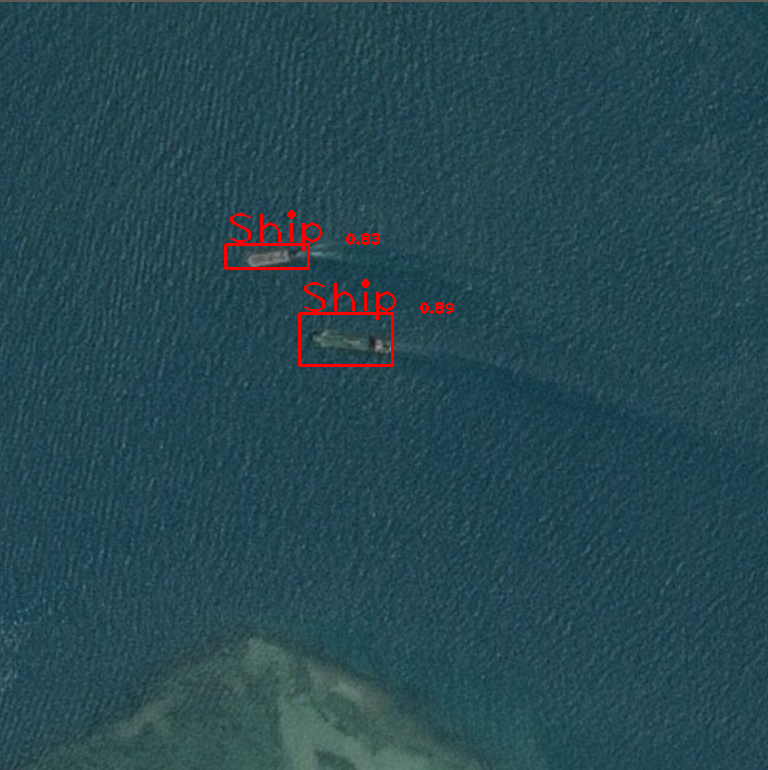

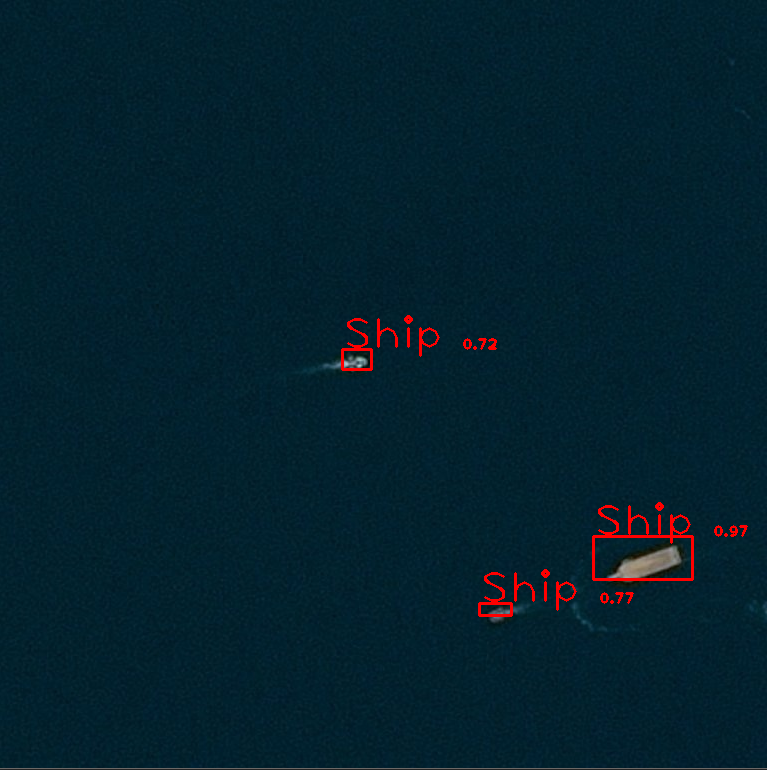

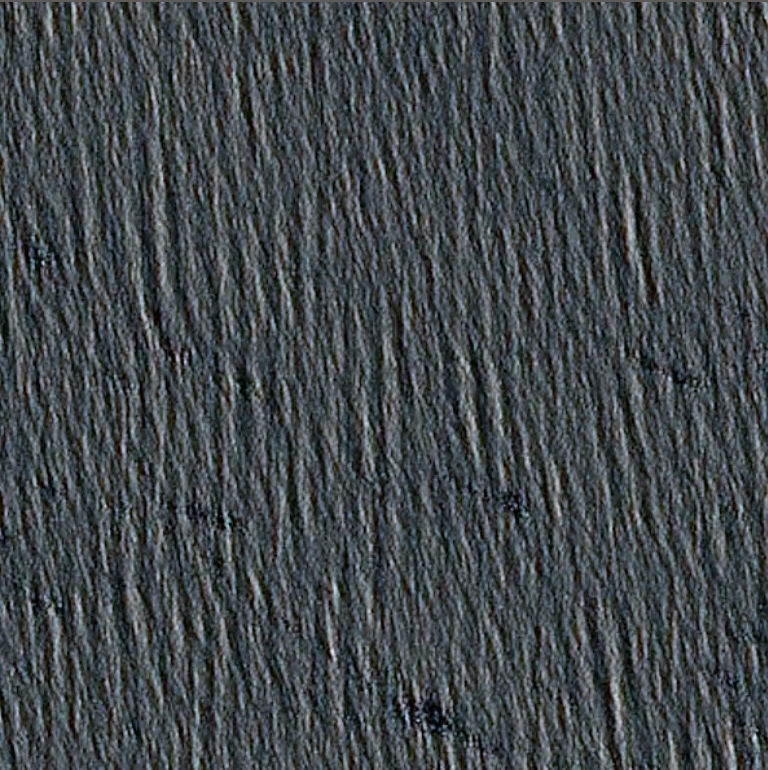

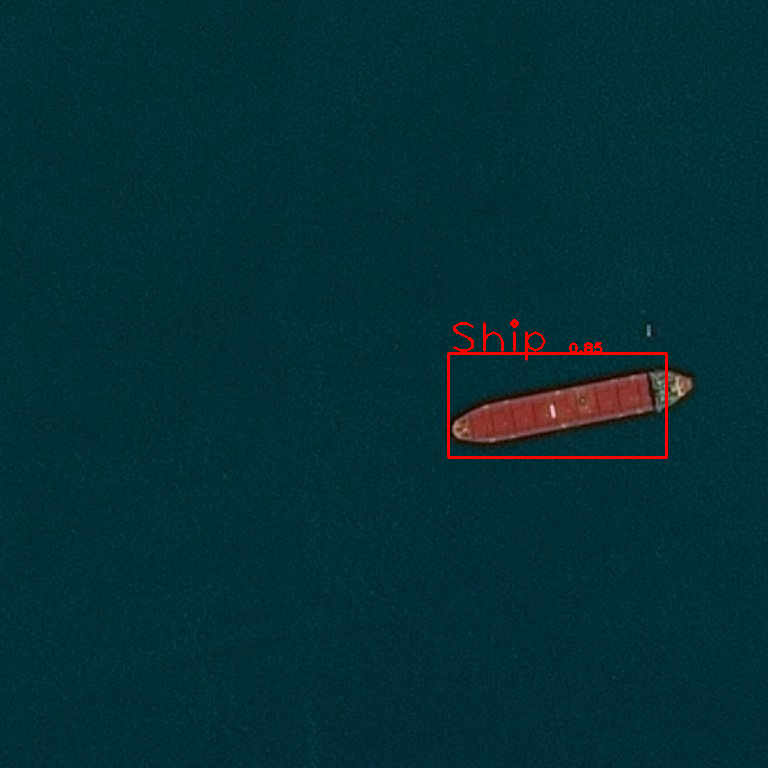